## Project Name - **Zomato Restaurant**


##### Name - Aman Mulla.
##### Batch - DS2307



# **Project Summary -**

The Zomato Data Analysis project offers a comprehensive exploration for food enthusiasts seeking the best global cuisines within their budget. By leveraging datasets like Zomato.csv and country_code.csv, it aims to assist users in discovering value-for-money restaurants across different countries and cities. This analysis caters to diverse needs: aiding those in search of top-notch cuisines, identifying localities with a high density of restaurants serving specific cuisines, and predicting the average cost for two as well as the price range.

The Zomato.csv dataset includes key restaurant details such as unique IDs, names, locations, cuisines offered, cost for two, ratings, and more. By employing techniques like Pandas merge operations to combine datasets, this analysis aims to predict the average cost for two individuals and the price range. This project serves as a valuable tool for food enthusiasts, travelers, and those looking to explore global culinary experiences economically, empowering them to make informed dining choices across various locales worldwide.

**Ket attributes from the dataset:(From zomato.csv)**
1. **Restaurant Name**: Varied names across diverse cuisines and localities.
2. **Country Code**: Represents different countries where restaurants are located.
3. **City**: Distribution across cities globally, showcasing culinary diversity.
4. **Address**: Specific location details of restaurants.
5. **Locality**: Spread across different areas within cities.
6. **Locality Verbose**: Detailed descriptions of localities.
7. **Longitude & Latitude**: Coordinates pinpointing restaurant locations.
8. **Cuisines**: Diverse range of offered cuisines.
9. **Average Cost for Two**: Varies widely based on currencies and locations.
10. **Currency**: Different currencies based on the country.
11. **Table Booking**: Binary distribution - available (yes) or not available (no).
12. **Online Delivery**: Binary distribution - available (yes) or not available (no).
13. **Is Delivering**: Binary distribution - delivering (yes) or not delivering (no).
14. **Switch to Order Menu**: Binary distribution - option to switch menu (yes) or not (no).
15. **Price Range**: Categorized range for food prices.
16. **Aggregate Rating**: Ratings out of 5, varying based on user reviews.
17. **Rating Color**: Represents the color based on the average rating.
18. **Rating Text**: Textual representation of the rating (e.g., excellent, good, etc.).
19. **Votes**: Count of ratings casted by patrons.

# **Problem Statement**

**The Zomato Data Analysis project aims to predict two key aspects from the dataset: the average cost for two individuals and the price range. Leveraging the Zomato.csv dataset along with the country_code.csv file, this analysis seeks to assist food enthusiasts and budget-conscious diners in finding value-for-money restaurants worldwide. By utilizing attributes like restaurant details, location, cuisines offered, pricing, ratings, and more, the objective is to employ predictive modeling techniques to estimate the average cost for two and categorize price ranges. Through this, the project intends to empower users to make informed decisions while exploring diverse cuisines globally, identifying affordable dining options, and understanding the cost variations across different countries and cities.**

## Knowing data and variable in dataset

In [ ]:
# Importing Necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)

In [ ]:
# importing datasets

zomato_data = pd.read_csv('/content/drive/MyDrive/DataSets/zomato.csv',encoding ='latin1')

zomato_data.head()


country_code = pd.read_csv('/content/drive/MyDrive/DataSets/Country-Code.csv')

country_code.head()



,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
# To avoide type error will rename column name

zomato_data.rename(columns={'Restaurant ID':'Restaurant_ID','Restaurant Name':'Restaurant_Name','Country Code':'Country_Code',
                            'Locality Verbose':'Locality_Verbose','Average Cost for two':'Average_Cost_for_two','Has Table booking':'Has_Table_booking',
                            'Has Online delivery':'Has_Online_delivery','Is delivering now':'Is_delivering_now','Switch to order menu':'Switch_to_order_menu',
                            'Price range':'Price_range','Aggregate rating':'Aggregate_rating','Rating color':'Rating_color','Rating text':'Rating_text'},inplace=True)


country_code.rename(columns={'Country Code':'Country_Code'},inplace=True)


In [ ]:
# merging two datasets using pd.merge

zomato_country_data = pd.merge(zomato_data,country_code,on='Country_Code',how='inner')

zomato_country_data.head(2)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [ ]:
zomato_country_data.isnull().sum()

Restaurant_ID           0
Restaurant_Name         0
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Is_delivering_now       0
Switch_to_order_menu    0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

<Axes: >

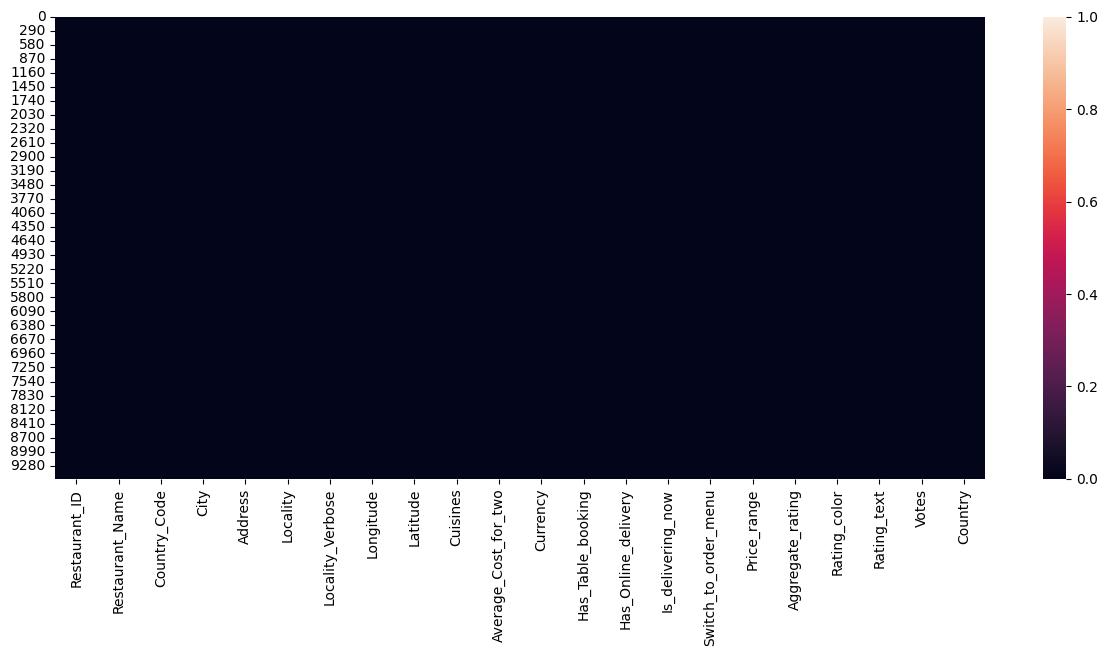

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(zomato_country_data.isnull())

**From .isnull(), we can observe that have null values in 'Cuisines' column. So will fill this NaNs with 'N/A'.**

In [ ]:
columns_to_fill = ['Cuisines']
zomato_country_data[columns_to_fill] = zomato_country_data[columns_to_fill].fillna('N/A')

In [ ]:
zomato_country_data.isnull().sum()

Restaurant_ID           0
Restaurant_Name         0
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Is_delivering_now       0
Switch_to_order_menu    0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

# In the dataset, there are columns for 'Country' and 'Currency.' Each currency has its own values, which can be challenging to comprehend. For better clarity, all currencies will be converted to Indian Rupees for ease of understanding

In [72]:
zomato_country_data['Country'].value_counts()

3     8652
14     434
13      80
1       60
12      60
9       60
5       40
11      34
0       24
6       22
4       21
8       20
7       20
10      20
2        4
Name: Country, dtype: int64

In [ ]:
# will combine country with respect to their own currency

# List of countries
countries = ['India', 'Australia', 'Brazil', 'Canada', 'Indonesia', 'New Zealand', 'Phillipines', 'Qatar', 'Singapore',
             'South Africa', 'Sri Lanka', 'Turkey', 'UAE', 'United Kingdom', 'United States']
for i in countries:
    print(i +": "+ zomato_country_data.loc[zomato_country_data['Country'] == i, 'Currency'].unique())

['India: Indian Rupees(Rs.)']
['Australia: Dollar($)']
['Brazil: Brazilian Real(R$)']
['Canada: Dollar($)']
['Indonesia: Indonesian Rupiah(IDR)']
['New Zealand: NewZealand($)']
['Phillipines: Botswana Pula(P)']
['Qatar: Qatari Rial(QR)']
['Singapore: Dollar($)']
['South Africa: Rand(R)']
['Sri Lanka: Sri Lankan Rupee(LKR)']
['Turkey: Turkish Lira(TL)']
['UAE: Emirati Diram(AED)']
['United Kingdom: Pounds(\x8c£)']
['United States: Dollar($)']


**Australia is listed with the currency label 'Dollar,' but the actual currency of Australia is the 'Australian Dollar.' Similarly, Canada is indicated with 'Dollar,' whereas its accurate currency is the 'Canadian Dollar.' Singapore is also assigned the label 'Dollar,' yet its official currency is the 'Singapore Dollar.' Additionally, the Philippines is mentioned with 'Botswana Pula (P)' as its currency, although the currency for the Philippines is, in fact, the 'Philippine Peso.' It's worth noting that Botswana is not included in the dataset.**

In [ ]:
# Assigning countries with their official currency

zomato_country_data.loc[zomato_country_data['Country'] == 'Australia', 'Currency'] = 'Australian ($)'
zomato_country_data.loc[zomato_country_data['Country'] == 'Canada', 'Currency'] = 'Canadian ($)'
zomato_country_data.loc[zomato_country_data['Country'] == 'Phillipines', 'Currency'] = 'Philippine Peso (PHP)'
zomato_country_data.loc[zomato_country_data['Country'] == 'Singapore', 'Currency'] = 'Singapore ($)'

### Will convert all currency in Indian Rupees,

India: 1 Rupees = 1 INR

Australia: 1 Rupees = 0.018 AUD

Brazil: 1 Rupees = 0.058 BRL

Canada: 1 Rupees = 0.16 CAD

Indonesia: 1 Rupees = 185.25 IDR

New Zealand: 1 Rupees = 0.019 NZD

Philippines: 1 Rupees = 0.67 PHP

Qatar: 1 Rupees = 0.044 QAR

Singapore: 1 Rupees = 0.016 SGD

South Africa: 1 Rupees = 0.22 ZAR

Sri Lanka: 1 Rupees= 3.86 LKR

Turkey: 1 Rupees = 0.35 TRY

UAE: 1 Rupees = 0.044 AED

United Kingdom: 1 Rupees = 0.0094 GBP

United States: 1 Rupees = 0.012 USD

In [ ]:
# Converting currency for respective country in USD for further analysis
exchange_rates = {
    'Indian Rupees(Rs.)': 1.00,
    'Brazilian Real(R$)': 0.058,
    'Dollar($)': 0.012,
    'Emirati Diram(AED)': 0.044,
    'Indonesian Rupiah(IDR)': 185.25,
    'NewZealand($)': 0.019,
    'Pounds(��)': 0.0094,
    'Qatari Rial(QR)': 0.044,
    'Rand(R)': 0.22,
    'Sri Lankan Rupee(LKR)': 3.87,
    'Turkish Lira(TL)': 0.35,
    'Canadian ($)': 0.015,
    'Australian ($)': 0.018,
    'Philippine Peso (PHP)': 0.67,
    'Singapore ($)': 0.016,
}

# Function to extract currency and convert to Indian Rupees

def convert_to_Ruppes(row):
    currency = row['Currency']
    exchange_rate = exchange_rates.get(currency, 1.0)  # Default to 1.0 if currency not found
    cost_in_rupees = row['Average_Cost_for_two'] / exchange_rate
    return cost_in_rupees

# Apply the conversion function to the DataFrame
zomato_country_data['Average_Cost_for_two'] = zomato_country_data.apply(convert_to_Ruppes, axis = 1)

In [ ]:
# Will check for description of dataset

zomato_country_data.describe()

,Restaurant_ID,Country_Code,Longitude,Latitude,Average_Cost_for_two,Price_range,Aggregate_rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,776.247403,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,1067.072016,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,300.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,500.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,800.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,31250.000000,4.000000,4.900000,10934.000000


## **Description of Numerical columns**

1. **'Average Cost for Two'**: Ranges from 0.00 to 31250 in relevant currency. Mean cost: 776 units, with a moderate standard deviation of 1067, reflecting varied dining expenses for two.

2. **'Price Range'**: Categorizes pricing from 1 (lower-priced) to 4 (higher-priced), most commonly falling in range 2. Reflects the affordability and upscale nature of restaurants.

3. **'Aggregate Rating'**: Scores range from 0.0 to 4.9, averaging around 2.67, with a standard deviation of 1.52, indicating variability in restaurant ratings. Measures overall performance and quality.

4. **'Votes'**: Ranges from 0 to 10,934, averaging about 157 votes per restaurant. Wide standard deviation of 430.17 suggests varying levels of customer engagement and feedback.

5. **'Cuisine Count'**: Varies from 0 to 8, averaging approximately 2.06 cuisines per restaurant. Offers insights into culinary diversity and expertise.

#### Chart - 1

### **Restaurant distribution by countries**

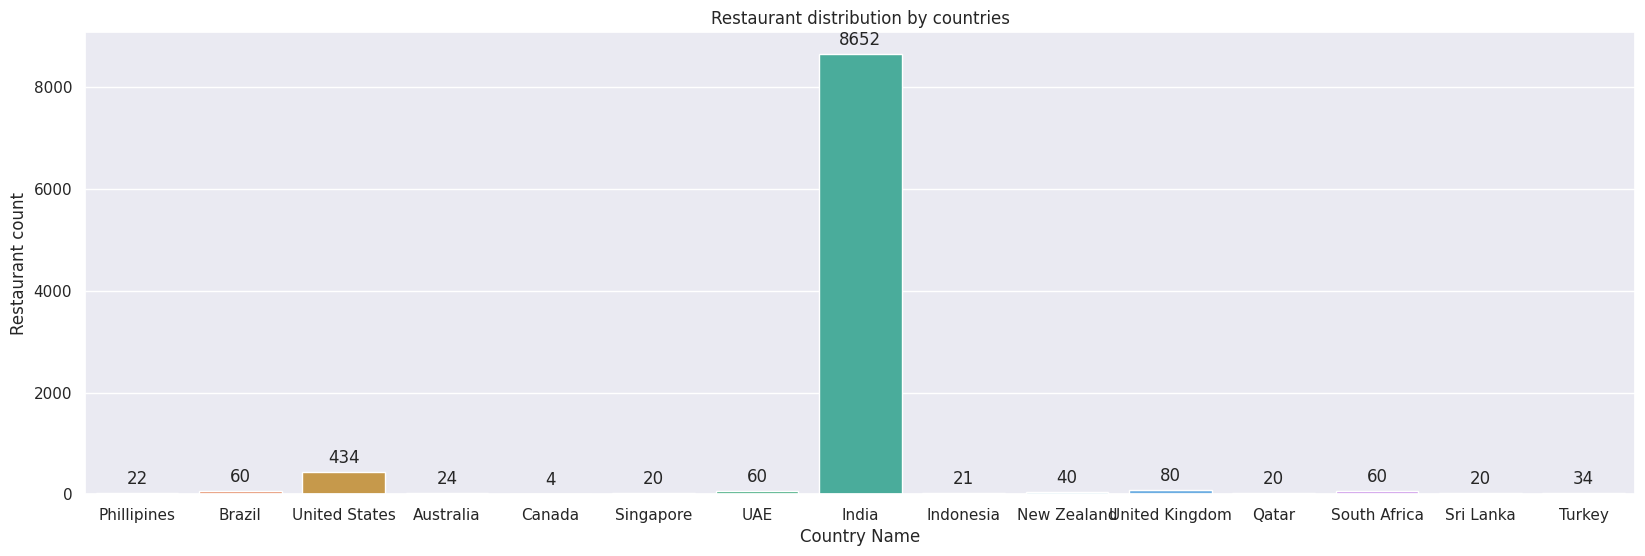

In [ ]:
zomato_country_data['Country'].value_counts()

plt.figure(figsize=(20,6))
sns.set(style='darkgrid')
ax = sns.countplot(zomato_country_data,x='Country')

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.xlabel('Country Name')
plt.ylabel('Restaurant count')
plt.title('Restaurant distribution by countries')
plt.show()

**Insights from above chart:** The distribution highlights the regional focus of the Zomato platform, indicating its popularity and prevalence in India compared to other countries in the dataset.

* **India Dominates Restaurant Counts**: The count plot illustrates a stark contrast between India and other countries, signifying the dominance of India in the dataset with a significantly higher number of restaurants compared to other nations. This indicates a substantial representation of Indian restaurants in the Zomato dataset.
* **Fewer Restaurants in Other Major Countries**: Countries like the United States, United Kingdom, Brazil, UAE, South Africa, and New Zealand have comparatively fewer restaurants listed on Zomato, suggesting a lower representation in this dataset in comparison to India.
* **Minor Representation in Many Countries**: Several countries, including Turkey, Australia, Philippines, Indonesia, Singapore, Qatar, Sri Lanka, and Canada, have a relatively minor presence, with a considerably smaller count of restaurants listed in the dataset.
* **Global Representation**: While India stands out prominently in terms of restaurant count, the dataset also exhibits a global representation with restaurants listed from various countries worldwide. However, the distribution is heavily skewed towards India, reflecting a concentration of restaurant data in that region within the dataset.
* **Potential Focus Areas**: For users or stakeholders interested in specific cuisines or dining experiences in countries with fewer listings, this chart helps identify areas that may have limited data representation and could potentially benefit from more comprehensive listings on the Zomato platform.


#### Chart - 2

### **Top 10 cities with Restaurant count**

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Amritsar          21
Ahmedabad         21
Guwahati          21
Name: Restaurant_ID, dtype: int64


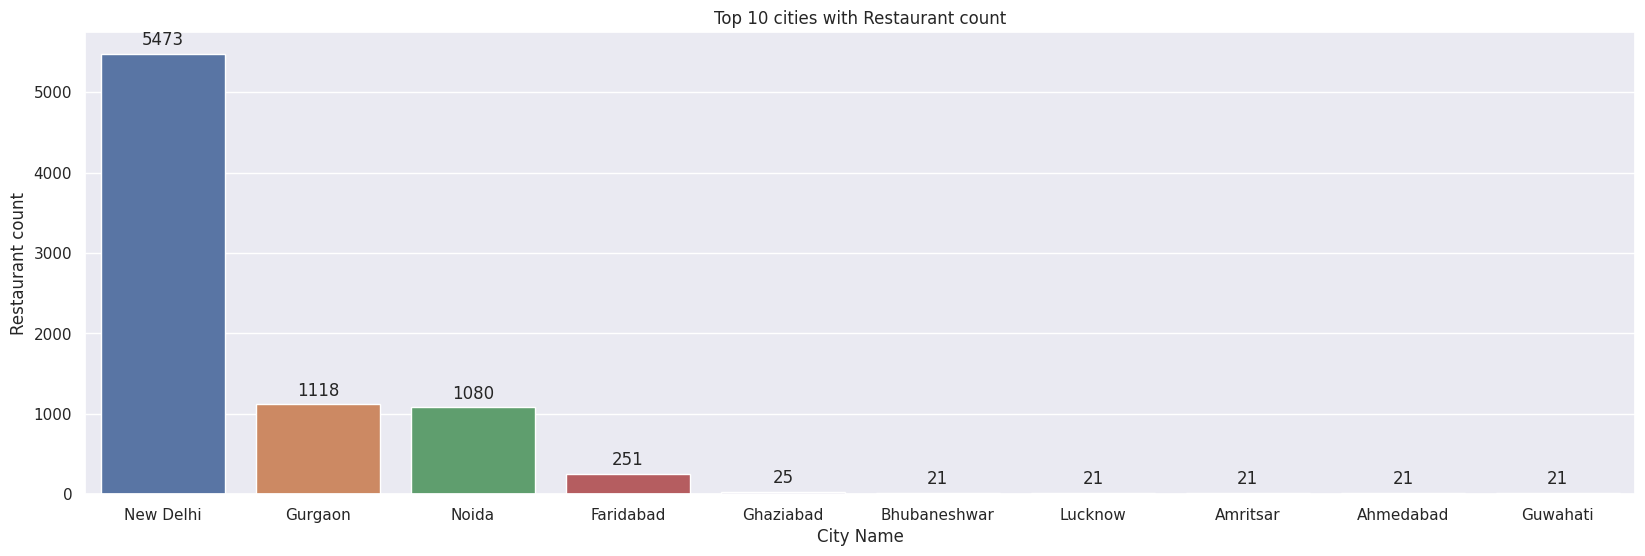

In [ ]:
city_resto = zomato_country_data.groupby('City')['Restaurant_ID'].count()

city_resto_sorted = city_resto.sort_values(ascending=False).head(10)

print(city_resto_sorted)

plt.figure(figsize=(20,6))
sns.set(style='darkgrid')
ax= sns.barplot(data=zomato_country_data,x=city_resto_sorted.index,y=city_resto_sorted.values)

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.xlabel('City Name')
plt.ylabel('Restaurant count')
plt.title('Top 10 cities with Restaurant count')
plt.show()

**Insights from above chart:** This chart provides a quick overview of the restaurant distribution across various cities, offering valuable insights into the concentration of dining establishments in the top urban areas within the dataset.

* **New Delhi Dominance**: The chart highlights New Delhi as the city with the highest number of restaurants among the top 10 cities, far surpassing the rest.
* **NCR (National Capital Region) Presence**: Gurgaon and Noida also show significant restaurant counts, indicating the strong presence of dining establishments in the National Capital Region, albeit significantly lower than New Delhi.
* **Faridabad and Other Cities**: Faridabad follows, albeit with a noticeably lower count than the top three cities. The other cities like Ghaziabad, Bhubaneshwar, Lucknow, Amritsar, Ahmedabad, and Guwahati have substantially fewer restaurants compared to the top four cities.

#### Chart - 3

### **Top 5 Restaurant for top 2 cities with highest Restaurant count**

Restaurant_Name
Indian Accent - The Manor    4.9
Masala Library               4.9
Naturals Ice Cream           4.8
Kopper Kadai                 4.8
Pa Pa Ya                     4.7
Name: Aggregate_rating, dtype: float64
Restaurant_Name
Caterspoint    4.9
Prankster      4.8
Matchbox       4.8
feel ALIVE     4.7
Dudleys        4.6
Name: Aggregate_rating, dtype: float64


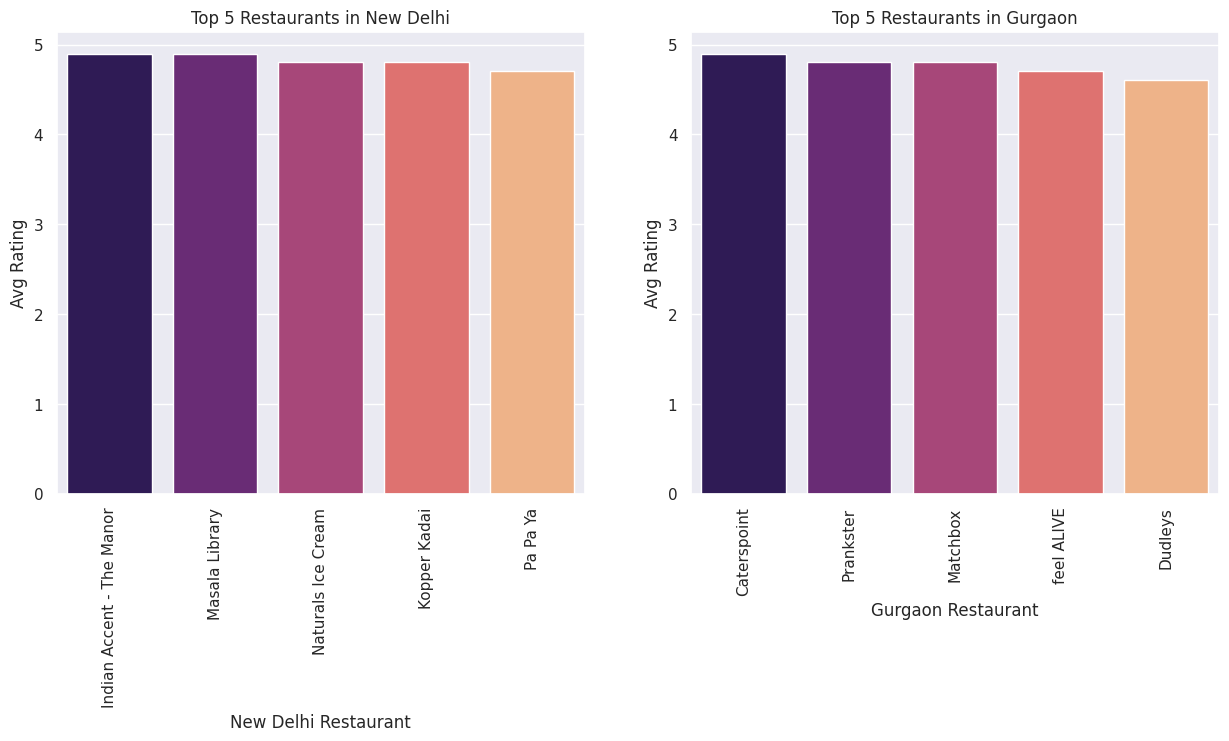

In [ ]:
delhi_resto = zomato_country_data[zomato_country_data['City']=='New Delhi']

delhi_resto_rating = delhi_resto.groupby('Restaurant_Name')['Aggregate_rating'].mean()

delhi_resto_rating_sorted = delhi_resto_rating.sort_values(ascending=False).head(5)

print(delhi_resto_rating_sorted)

Gurgaon_resto = zomato_country_data[zomato_country_data['City']=='Gurgaon']

Gurgaon_resto_rating = Gurgaon_resto.groupby('Restaurant_Name')['Aggregate_rating'].mean()

Gurgaon_resto_rating_sorted = Gurgaon_resto_rating.sort_values(ascending=False).head(5)

print(Gurgaon_resto_rating_sorted)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.set(style='darkgrid')
sns.barplot(x=delhi_resto_rating_sorted.index, y=delhi_resto_rating_sorted.values, ax=axes[0], palette='magma')
axes[0].set_xlabel('New Delhi Restaurant')
axes[0].set_ylabel('Avg Rating')
axes[0].set_xticklabels(delhi_resto_rating_sorted.index, rotation=90)
axes[0].set_title('Top 5 Restaurants in New Delhi')

sns.barplot(x=Gurgaon_resto_rating_sorted.index, y=Gurgaon_resto_rating_sorted.values, ax=axes[1], palette='magma')
axes[1].set_xlabel('Gurgaon Restaurant')
axes[1].set_ylabel('Avg Rating')
axes[1].set_xticklabels(Gurgaon_resto_rating_sorted.index, rotation=90)
axes[1].set_title('Top 5 Restaurants in Gurgaon')

plt.show()

**Insights from above chart:** This chart performs an analysis of the top 5 restaurants in New Delhi and Gurgaon based on their average ratings.

* **New Delhi Restaurants**:
    1. Indian Accent - The Manor & Masala Library (4.9): Both restaurants stand out with the highest average rating of 4.9, showcasing exceptional customer satisfaction.
    2. Naturals Ice Cream & Kopper Kadai (4.8): Follow closely with similarly high average ratings, indicating consistent positive feedback.
    3. Pa Pa Ya (4.7): While slightly lower, still maintains a strong rating, likely providing a favorable dining experience.

* **Gurgaon Restaurants**:

    1. Caterspoint (4.9) & Prankster (4.8): Highlighted as the top-rated restaurants, mirroring the excellence seen in New Delhi's top-rated establishments.
    2. Matchbox & feel ALIVE (4.8): Share similar high ratings, suggesting a commendable dining experience.
    3. Dudleys (4.6): Although slightly lower, still maintains a relatively good average rating among the top 5.

**Top-rated restaurants in both cities demonstrate a consistent level of excellence, often ranging between 4.7 to 4.9.These ratings span across different cuisines, indicating excellence not limited to specific types of restaurants.Higher ratings imply satisfied customers, highlighting these establishments as potentially popular choices among diners.**

#### Chart - 4

### **Cuisines wise restaurant count**

North Indian                      936
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
South Indian                      112
Bakery, Fast Food                 108
Chinese, North Indian             105
Mughlai                           103
Ice Cream, Desserts                83
Ice Cream                          74
North Indian, Fast Food            74
Name: Cuisines, dtype: int64


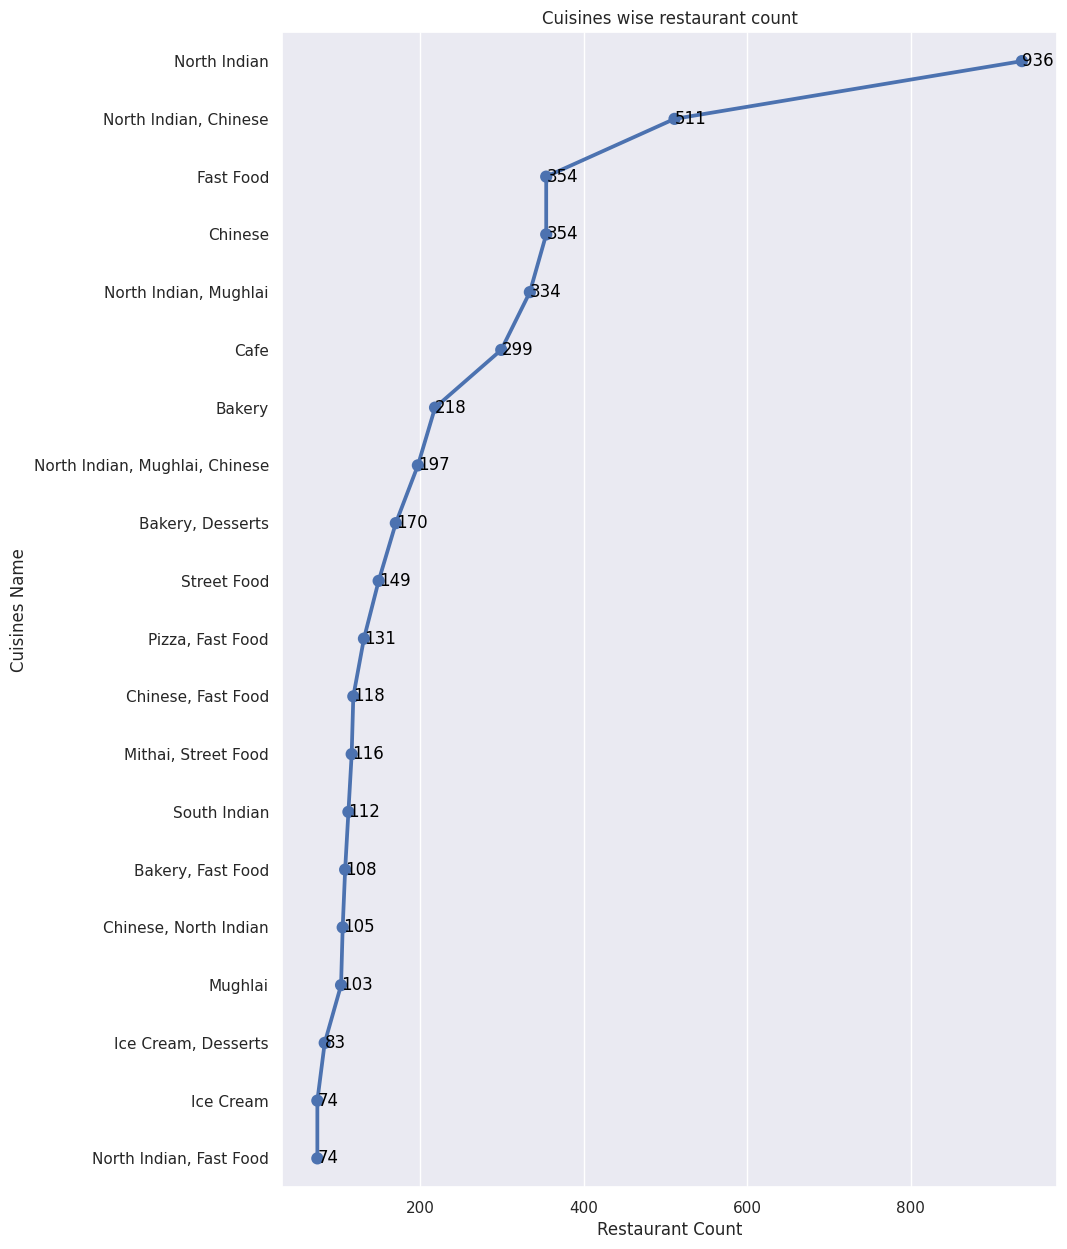

In [ ]:
cuisines_count =zomato_country_data['Cuisines'].value_counts().head(20)

print(cuisines_count)


plt.figure(figsize=(10,15))
sns.set(style='darkgrid')
ax = sns.pointplot(data=zomato_country_data,y=cuisines_count.index,x=cuisines_count.values)
plt.xlabel('Restaurant Count')
plt.ylabel('Cuisines Name')
plt.title('Cuisines wise restaurant count')

# Adding data labels
for i, v in enumerate(cuisines_count.values):
    ax.text(v + 0.2, i, str(v), color='black', va='center')

plt.show()

**Insights from above chart:**The chart depicts the popularity of different cuisines based on restaurant counts.

* North Indian cuisine has the highest restaurant count (936), indicating its popularity or prevalence in the dataset.
* North Indian, Chinese and Fast Food cuisines follow closely, displaying significant representation in restaurant offerings.
* The visualization showcases the diverse range of cuisines available in the dataset, with various combinations and singular offerings such as Chinese, Cafe, Bakery, Street Food, and Pizza, among others.
* The chart highlights popular combinations of cuisines, such as North Indian, Mughlai, Chinese, Bakery, Desserts, Pizza, Fast Food, indicating the prevalence of mixed or fusion food offerings.
* It allows for easy comparison between different cuisines, aiding in understanding the relative abundance or scarcity of specific food types in the dataset.

#### Chart - 5

### **Avg. cost for two distribution over countries**

In [ ]:
table = pd.pivot_table(zomato_country_data,index=['Country','Currency'],values=['Average_Cost_for_two'],aggfunc=np.mean)

table = table.reset_index()

table

,Country,Currency,Average_Cost_for_two
0,Australia,Australian ($),1337.962963
1,Brazil,Brazilian Real(R$),2321.839080
2,Canada,Canadian ($),2416.666667
3,India,Indian Rupees(Rs.),623.370319
4,Indonesia,Indonesian Rupiah(IDR),1517.897307
5,New Zealand,NewZealand($),3671.052632
6,Phillipines,Philippine Peso (PHP),2398.236092
7,Qatar,Qatari Rial(QR),5085.227273
8,Singapore,Singapore ($),9734.375000
9,South Africa,Rand(R),1907.878788


<ipython-input-19-ab20772eea8d>:17: UserWarning: Glyph 140 (\x8c) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


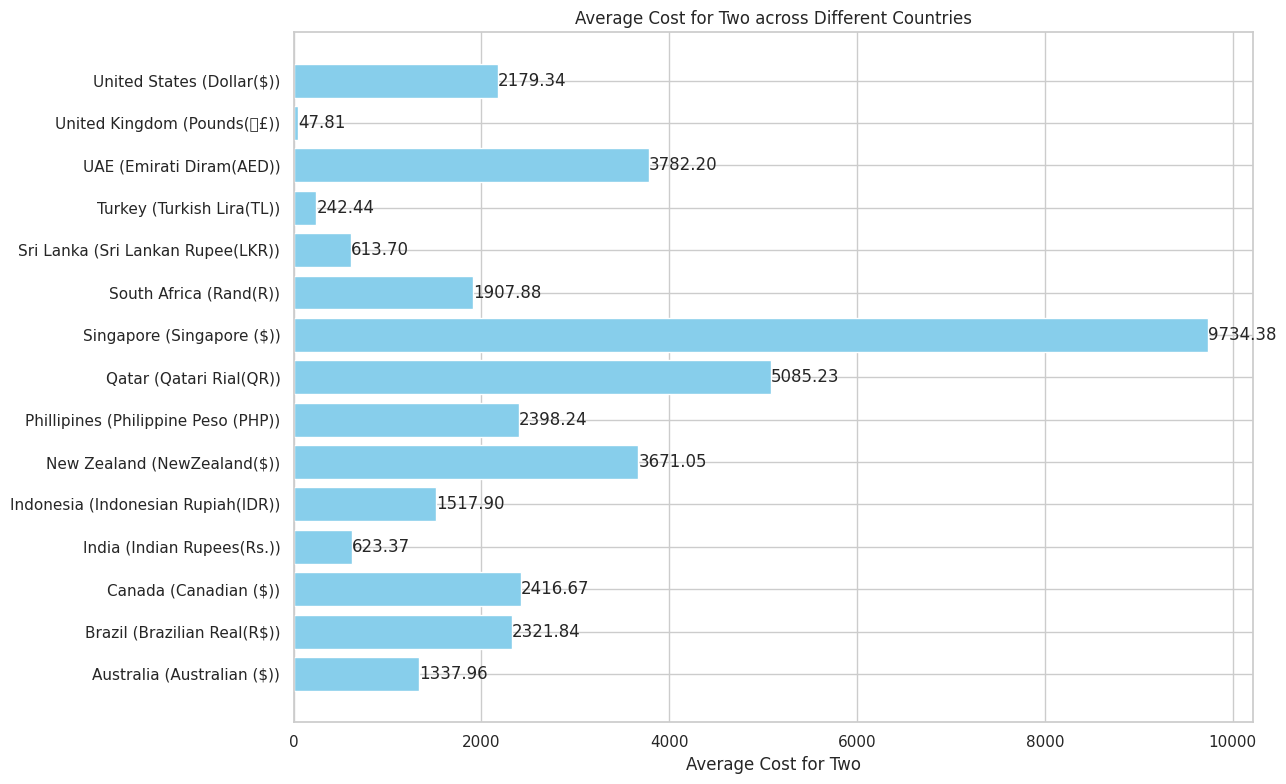

In [ ]:
table = pd.pivot_table(zomato_country_data,index=['Country','Currency'],values=['Average_Cost_for_two'],aggfunc=np.mean)

table = table.reset_index()

table

plt.figure(figsize=(13,8))
sns.set(style='whitegrid')
bars  =  plt.barh(y=table['Country'] + ' (' + table['Currency'] + ')', width=table['Average_Cost_for_two'], color='skyblue')
plt.xlabel('Average Cost for Two')
plt.title('Average Cost for Two across Different Countries')

# Adding data labels
for bar, value in zip(bars, table['Average_Cost_for_two']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.2f}', va='center', ha='left')

plt.tight_layout()
plt.show()

**Insights from above chart:** It showcases the variation in average costs for two among different countries, providing an overview of how dining expenses differ globally.

* The chart displays varying average costs for two across different countries, ranging from as low as 47.81 Pounds (£) in the United Kingdom to as high as 9734.38 Singapore Dollars ($) in Singapore.
* Higher Costs in Developed Nations: Singapore and UAE showcase higher average costs for two, which might align with their status as developed economies.
* Lower Costs in Developing Nations: Countries like Sri Lanka and India exhibit lower average costs, reflecting a potentially lower cost of living.



**There's a wide range of average costs for two across various countries, signifying diverse pricing structures globally.Some countries offer more economical dining experiences, while others lean toward being more expensive, highlighting the variance in cost based on location.The notably high value for Indonesia might indicate an outlier in the dataset, requiring further investigation.**

#### Chart - 6

### **Avg. cost for two distribution in India (Top 20 Cities)**

              Average_Cost_for_two
City                              
Panchkula              2000.000000
Hyderabad              1361.111111
Pune                   1337.500000
Jaipur                 1310.000000
Kolkata                1272.500000
Bangalore              1232.500000
Goa                    1175.000000
Ludhiana               1160.000000
Chennai                1085.000000
Mumbai                 1072.500000
Chandigarh             1072.222222
Agra                   1065.000000
Indore                  960.000000
Kanpur                  915.000000
Lucknow                 859.523810
Ahmedabad               857.142857
Puducherry              842.500000
Secunderabad            825.000000
Guwahati                821.428571
Vadodara                820.000000


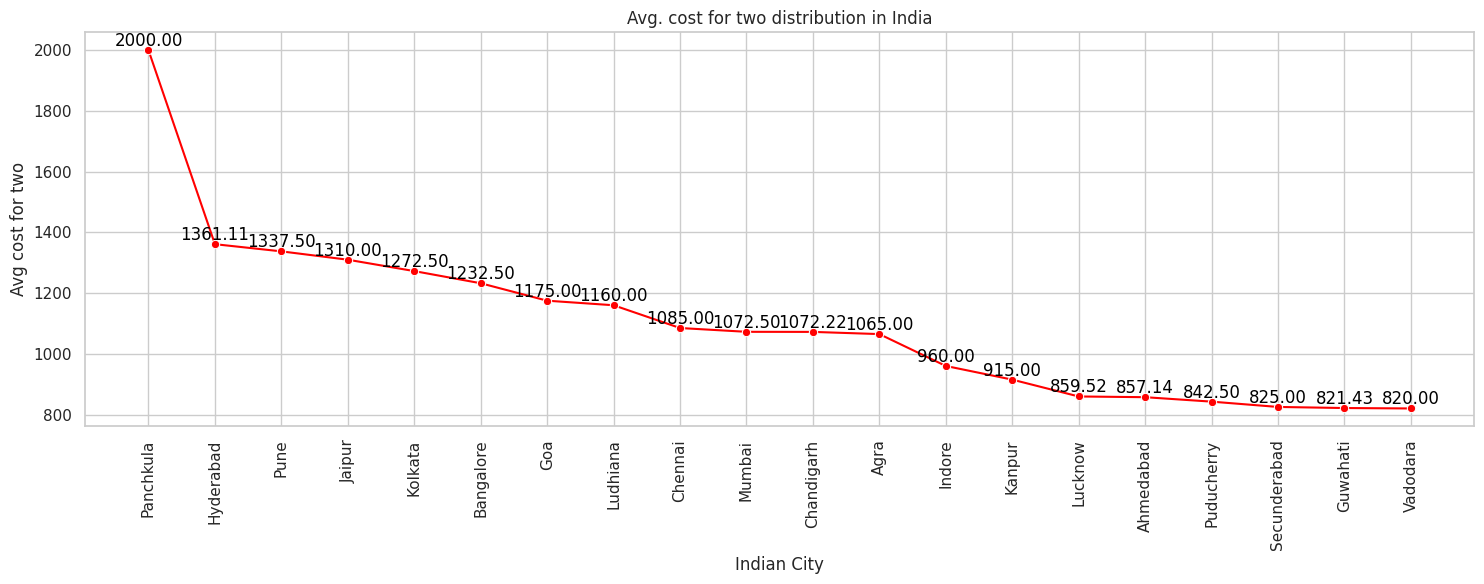

In [ ]:
avg_cost_india = zomato_country_data[zomato_country_data['Country']=='India']

india_citis = pd.pivot_table(avg_cost_india,index=['City'],values=['Average_Cost_for_two'],aggfunc=np.mean)

india_citis_sorted = india_citis.sort_values(by='Average_Cost_for_two',ascending=False).head(20)

print(india_citis_sorted)


plt.figure(figsize=(15, 6))
sns.set(style='whitegrid')
ax = sns.lineplot(data=india_citis_sorted, x=india_citis_sorted.index, y='Average_Cost_for_two', marker='o', color='red')
plt.xlabel('Indian City')
plt.ylabel('Avg cost for two')
plt.title('Avg. cost for two distribution in India')

# Adding data labels
for i, v in enumerate(india_citis_sorted['Average_Cost_for_two']):
    ax.text(i, v, f'{v:.2f}', color='black', va='bottom', ha='center')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insights from above chart:** The line plot provides a visual representation of the average cost for two in these cities, showcasing the disparity between high-cost dining destinations and more budget-friendly options.

* It highlights the cities where dining tends to be more expensive for two individuals, showcasing them at the peaks of the line plot.
* The upward or downward trend of the line showcases the general variation in dining costs across these cities.
* **Panchkula**: Shows the highest average cost for two, significantly higher compared to other cities, indicating it might be an upscale dining destination or have higher-end restaurants.
* **Hyderabad, Pune, Jaipur**: Follow Panchkula with relatively higher average costs, suggesting these cities might have a diverse range of mid to high-range dining options.
* **Kolkata, Bangalore, Goa**: Also demonstrate higher-than-average costs, indicating a moderately priced dining experience.
* **Chennai, Mumbai, Chandigarh**: Have average costs slightly above the mid-range, representing a balanced dining cost.
* **Ahmedabad, Puducherry, Secunderabad, Guwahati, Vadodara**: Show lower-than-average costs, possibly indicating more budget-friendly dining options.



#### Chart - 7

### **Proportion of Restaurants Offering Table Booking' or 'Proportion of Restaurants Offering Online Delivery**

No     8393
Yes    1158
Name: Has_Table_booking, dtype: int64
No     7100
Yes    2451
Name: Has_Online_delivery, dtype: int64


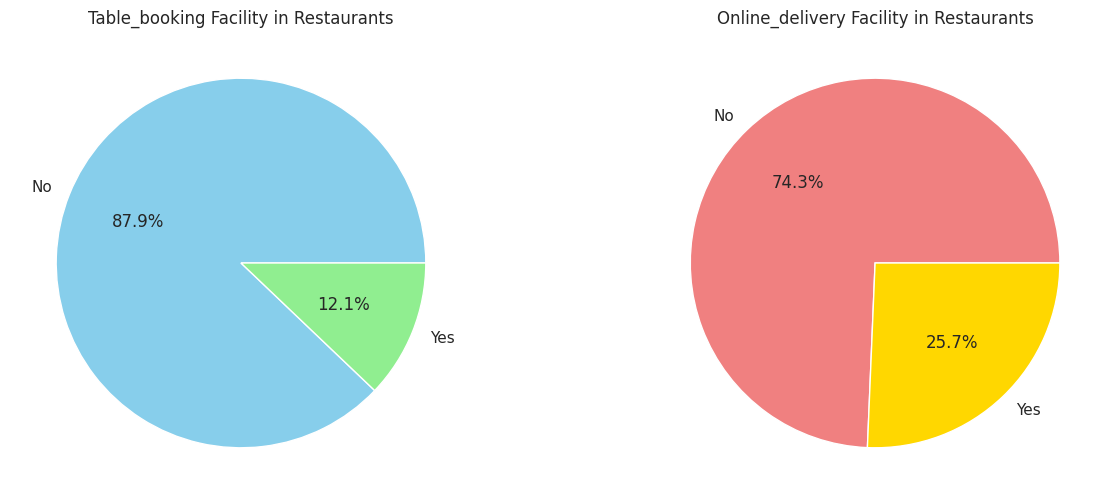

In [ ]:
Table_booking = zomato_country_data['Has_Table_booking'].value_counts()

print(Table_booking)

Online_delivery = zomato_country_data['Has_Online_delivery'].value_counts()

print(Online_delivery)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plotting Pie Chart for Table_booking
axes[0].pie(Table_booking.values, labels=Table_booking.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
axes[0].set_title('Table_booking Facility in Restaurants')

# Plotting Pie Chart for Online_delivery
axes[1].pie(Online_delivery.values, labels=Online_delivery.index, autopct='%1.1f%%', colors=['lightcoral', 'gold'])
axes[1].set_title('Online_delivery Facility in Restaurants')

plt.show()

**Insights from above chart:** The pie chart indicates that a  percentage of restaurants offer table booking facilities and Online_delivery Facility.

* **Table Booking Facility**:
  * No Table Booking: Represents around 85.7% (8393 restaurants) of the total restaurants analyzed.
  * Table Booking Available: Represents around 14.3% (1158 restaurants) of the total restaurants.

* **Online Delivery Facility**:
  * No Online Delivery: Represents approximately 74.3% (7100 restaurants) of the total restaurants.
  * Online Delivery Available: Represents about 25.7% (2451 restaurants) of the total restaurants.


**Table Booking: The high percentage of restaurants without table booking might influence diner decisions, favoring those that offer this service.**

**Online Delivery: Restaurants providing online delivery services might have a competitive advantage in attracting customers who prefer food delivery options.**

#### Chart - 8

### **Rating vs. Votes**

Text(0.5, 1.0, 'Rating vs. Votes')

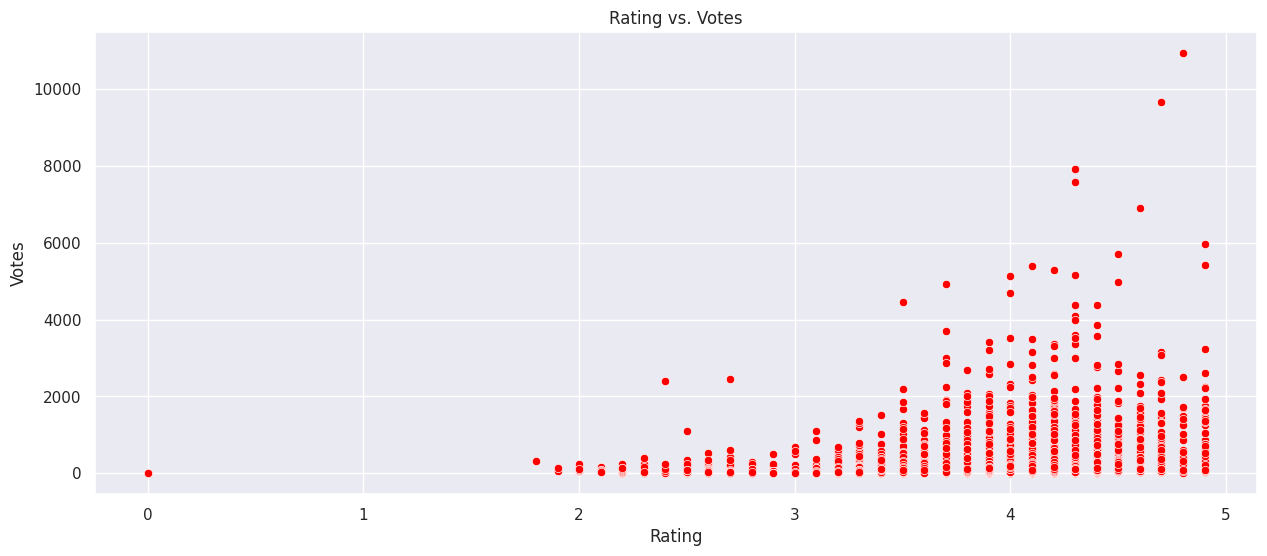

In [ ]:
plt.figure(figsize=(15, 6))
sns.set(style='darkgrid')
sns.scatterplot(data=zomato_country_data,x="Aggregate_rating",y="Votes",color='red')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Rating vs. Votes')

**Insights from above chart:** The visualization suggests that restaurants with higher ratings tend to attract more votes, implying that higher-rated restaurants likely garner more attention and feedback from customers.

* **Distribution Concentration**: The scatterplot showcases a concentration of points around specific rating values (e.g., between 3.5 to 4.5 ratings) and varying numbers of votes for these ratings.
* **Higher Votes at Higher Ratings**: There is a visible trend where higher ratings (around 4.0 to 4.5) tend to accumulate a significant number of votes compared to lower ratings.
* **Sparse Distribution in Lower Ratings**: Lower ratings (below 3.0) show a sparse distribution of votes, indicating fewer reviews or engagements for restaurants with lower ratings.
* **Peak Votes**: There's a prominent peak in votes around the 3.5 to 4.5 rating range, signifying increased engagement and feedback for restaurants falling within these ratings.
* **Potential Outliers**: Some lower-rated restaurants might have unexpectedly high votes, potentially indicating either significant controversy or exceptional attention despite the lower rating.
* **Engagement with Mid-Range Ratings**: The mid-range ratings (around 3.5 to 4.0) exhibit both a high number of votes and a diverse range of ratings, indicating a diverse customer response to restaurants falling in this category.

#### Chart - 9

### **Price range by Country**

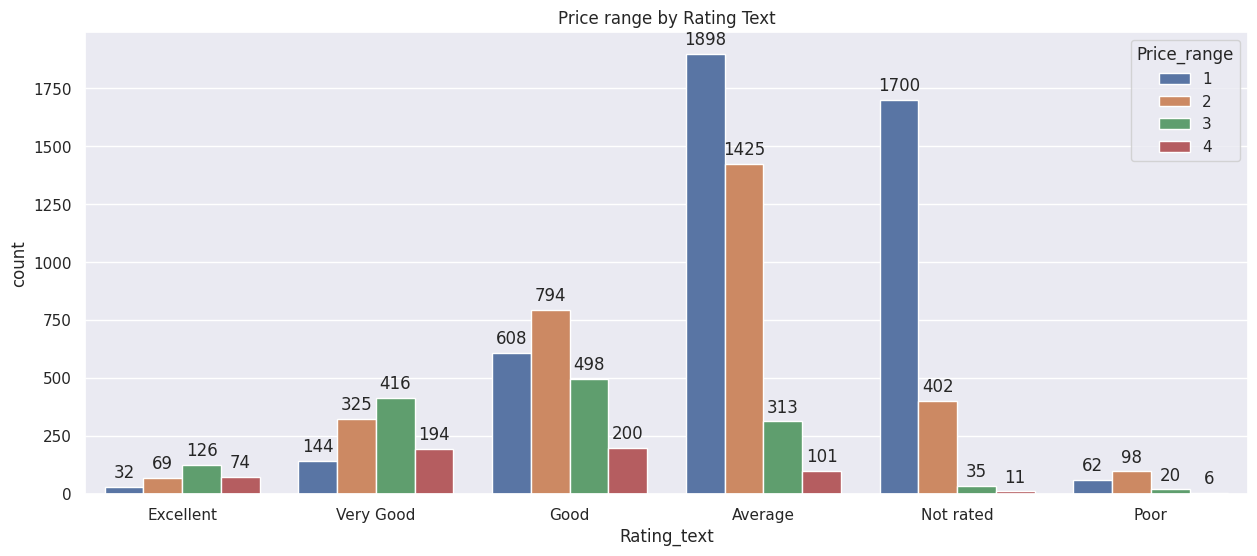

In [ ]:
rating_price_range = pd.crosstab(index=zomato_country_data['Rating_text'], columns=zomato_country_data['Price_range'])

rating_price_range


plt.figure(figsize = (15,6))
ax= sns.countplot(x = 'Rating_text', hue = 'Price_range', data = zomato_country_data)

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.title("Price range by Rating Text")
plt.show()

**Insights from above chart**

* **Rating Text Categories:**
    
    1, 2, 3, 4: These are different categories within the 'Rating_text' column, representing varying levels or labels for restaurant ratings.

* **Price Range and Rating Text:**

     Distribution Variation: The count plot visualizes the distribution of price ranges across different rating text categories.

     Price Range Intensity: The height of each bar represents the count of restaurants falling into a specific price range within each rating text category.
  
* **Distribution across Rating Text Categories and Price Ranges:**
     
     Category 1: Predominantly has restaurants in lower price ranges 1 and 2.

     Category 2: Shows a more even distribution across price ranges, with a significant presence in range 2.

     Category 3: Skewed towards higher price ranges 2 and 3, relatively fewer in range 1.

     Category 4: Mostly concentrated in the lower price ranges 1 and 2.

#### Chart - 10

### **Distribution of Price Ranges**

1    4444
2    3113
3    1408
4     586
Name: Price_range, dtype: int64


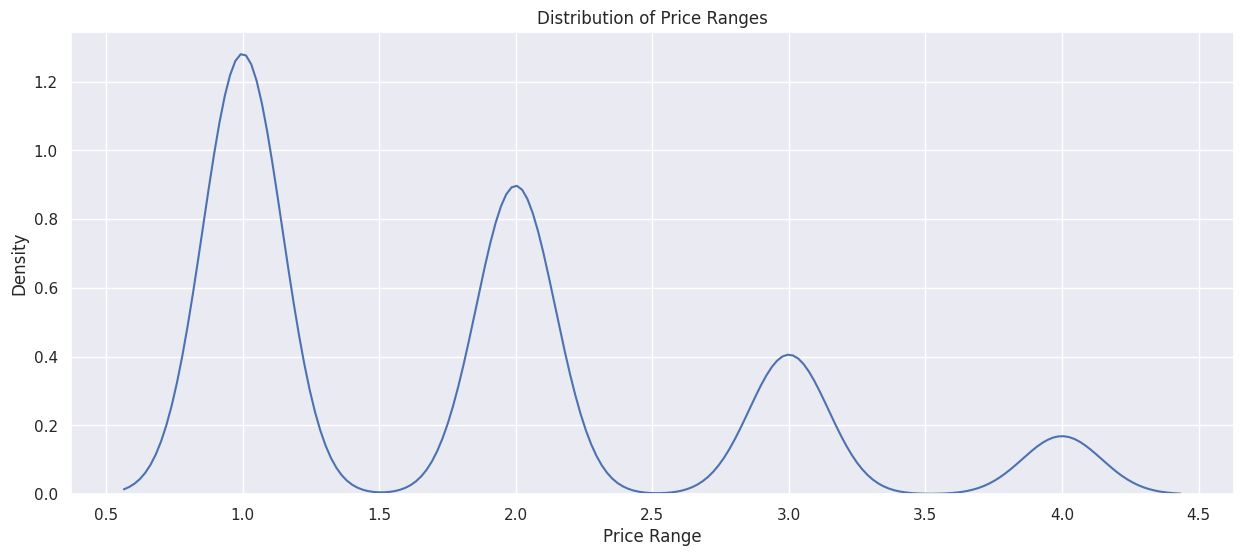

In [ ]:
price_range = zomato_country_data['Price_range'].value_counts()

print(price_range)

plt.figure(figsize=(15, 6))
sns.set(style='darkgrid')
sns.kdeplot(data=zomato_country_data, x="Price_range")
plt.xlabel('Price Range')
plt.title('Distribution of Price Ranges')
plt.show()

**Insights from above chart:** The KDE plot gives a visual representation of the distribution's shape and spread across different price ranges, aiding in understanding the density of restaurants within each range.

* **Peak Density**: Peaks or higher density regions in the KDE plot typically correspond to where the distribution has a greater concentration of values. Considering the value counts provided:

  * Price Range 1: The plot might display a peak around 1 due to the highest count of restaurants (4444) falling under this price range, indicating a denser concentration in this lower price category.
  * Price Range 2: Similarly, there might be a noticeable density for Price Range 2 (3113 restaurants).
  * Price Range 3 and 4: These higher price ranges, with 1408 and 586 restaurants respectively, might exhibit comparatively lower density peaks on the KDE plot.

* **Spread and Variability**: The width and spread of the KDE plot demonstrate the variability in the distribution. For instance:

   * Wider Spread: Price Range 1 and Price Range 2 might showcase broader distributions due to higher counts, indicating more variability within these price categories.
   * Narrower Spread: Price Range 3 and Price Range 4 might have narrower distributions due to lower counts, suggesting less variability among restaurants in these higher price categories.

#### Chart - 11

### **Distribution of Cost for Two based on Rating Text**

Rating_text
Average      3737
Excellent     301
Good         2100
Not rated    2148
Poor          186
Very Good    1079
Name: Restaurant_ID, dtype: int64


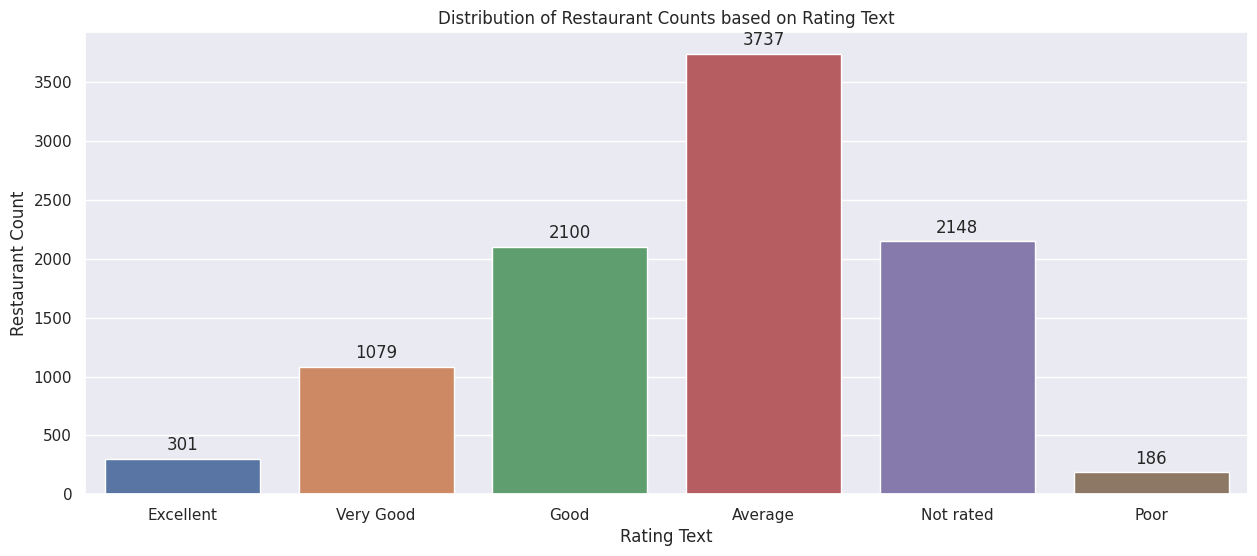

In [ ]:
rating_test_distribution = zomato_country_data.groupby('Rating_text')['Restaurant_ID'].count()

print(rating_test_distribution)

plt.figure(figsize=(15, 6))
ax= sns.countplot(zomato_country_data, x='Rating_text')

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')


plt.xlabel('Rating Text')
plt.ylabel('Restaurant Count')
plt.title('Distribution of Restaurant Counts based on Rating Text')
plt.show()

**Insights from above chart:** The chart depicts the count of restaurants falling under various rating categories such as 'Excellent', 'Very Good', 'Good', 'Average', 'Not Rated', etc.

* The chart predominantly shows a significantly high count of restaurants rated as 'Average'. This aligns with the value count, confirming that 'Average' rating is the most prevalent among the given ratings.
* The 'Good' rating category has a noticeable representation as well, showcasing a substantial count in the chart. It's the second most prevalent rating in the dataset, confirming its prominence.
* The chart depicts a lower count for 'Excellent', 'Poor', and 'Very Good' ratings, corresponding to their respective counts in the value list. These ratings have visibly lower representation compared to 'Average' and 'Good'.
* 'Not rated' restaurants, even though not assigned a specific rating, contribute to a significant count in the chart, reflecting a considerable portion of the dataset's entries.
* 'Excellent' and 'Poor' ratings have the lowest counts, and their representation in the chart is in line with their lower prevalence compared to other categories.

**The chart visually emphasizes the dominance of 'Average' and 'Good' ratings, indicating that a majority of restaurants fall within these categories.**

#### Chart - 12

### **Correlation between Price Range, Rating, and Votes**

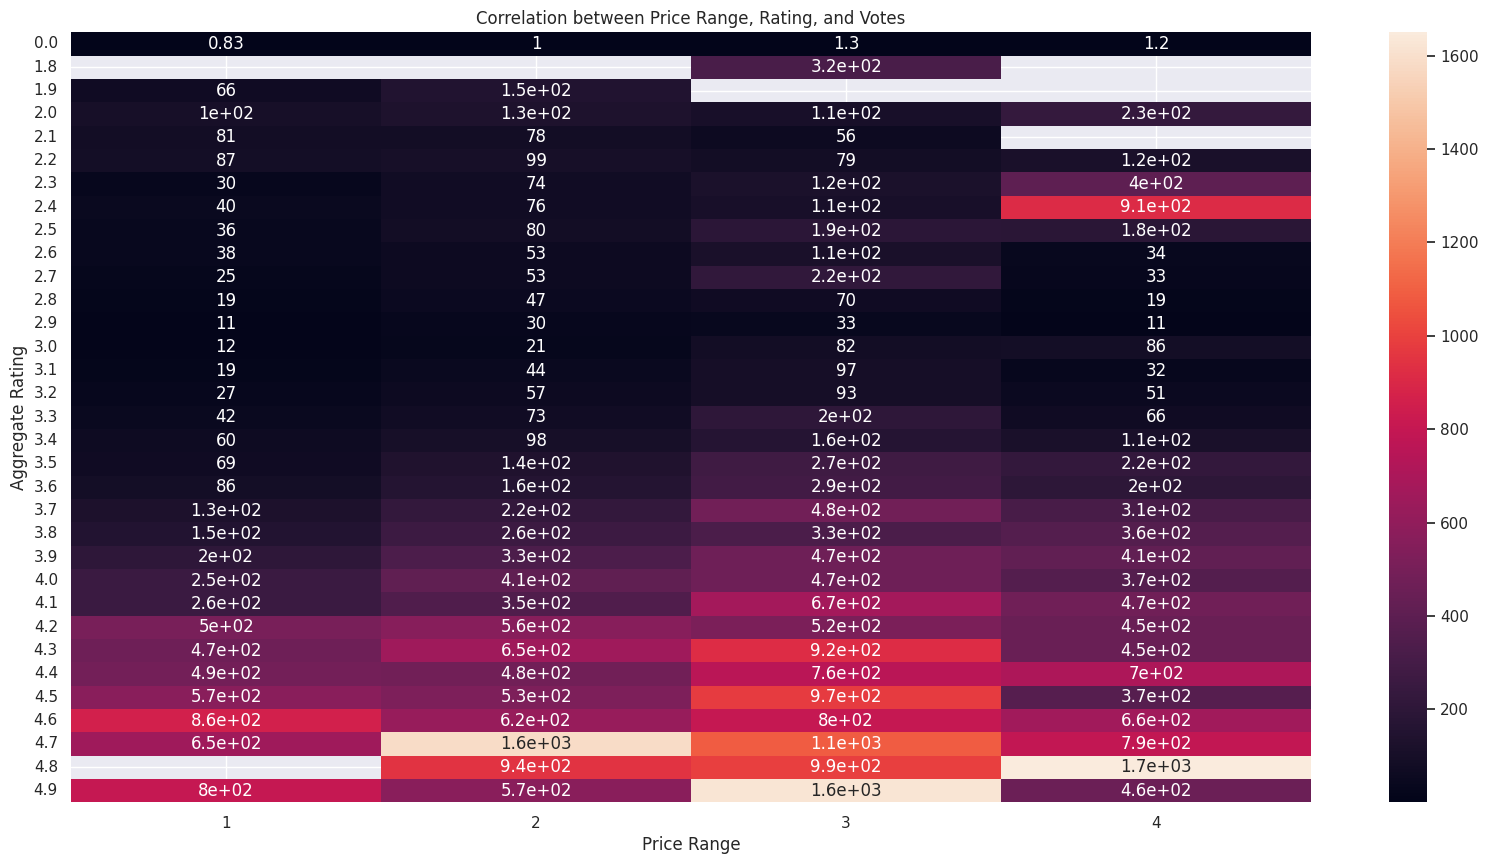

In [ ]:
pivot_data = zomato_country_data.pivot_table(index='Aggregate_rating', columns='Price_range', values='Votes', aggfunc='mean')

pivot_data

plt.figure(figsize=(20,10))
sns.heatmap(pivot_data, annot=True)
plt.title('Correlation between Price Range, Rating, and Votes')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

**Insights from above chart:** This heatmap suggests focusing further analysis on specific price range and rating combinations where correlations are strong or absent, potentially revealing valuable insights into customer behavior or restaurant performance.

* The intensity of colors (particularly darker shades) in the heatmap indicates the strength of correlation. Darker colors signify a stronger correlation, either positive or negative.
* Darker shades in some areas highlight the influence of votes on the relationship between price range and aggregate rating. It suggests that higher votes might contribute to higher ratings in certain price range categories.
* Sections with no color or lighter shades represent areas where the data might be sparse or missing, lacking a strong correlation between those specific combinations of attributes.

#### Chart - 13

### **Votes in Different Cities (Top 20)**

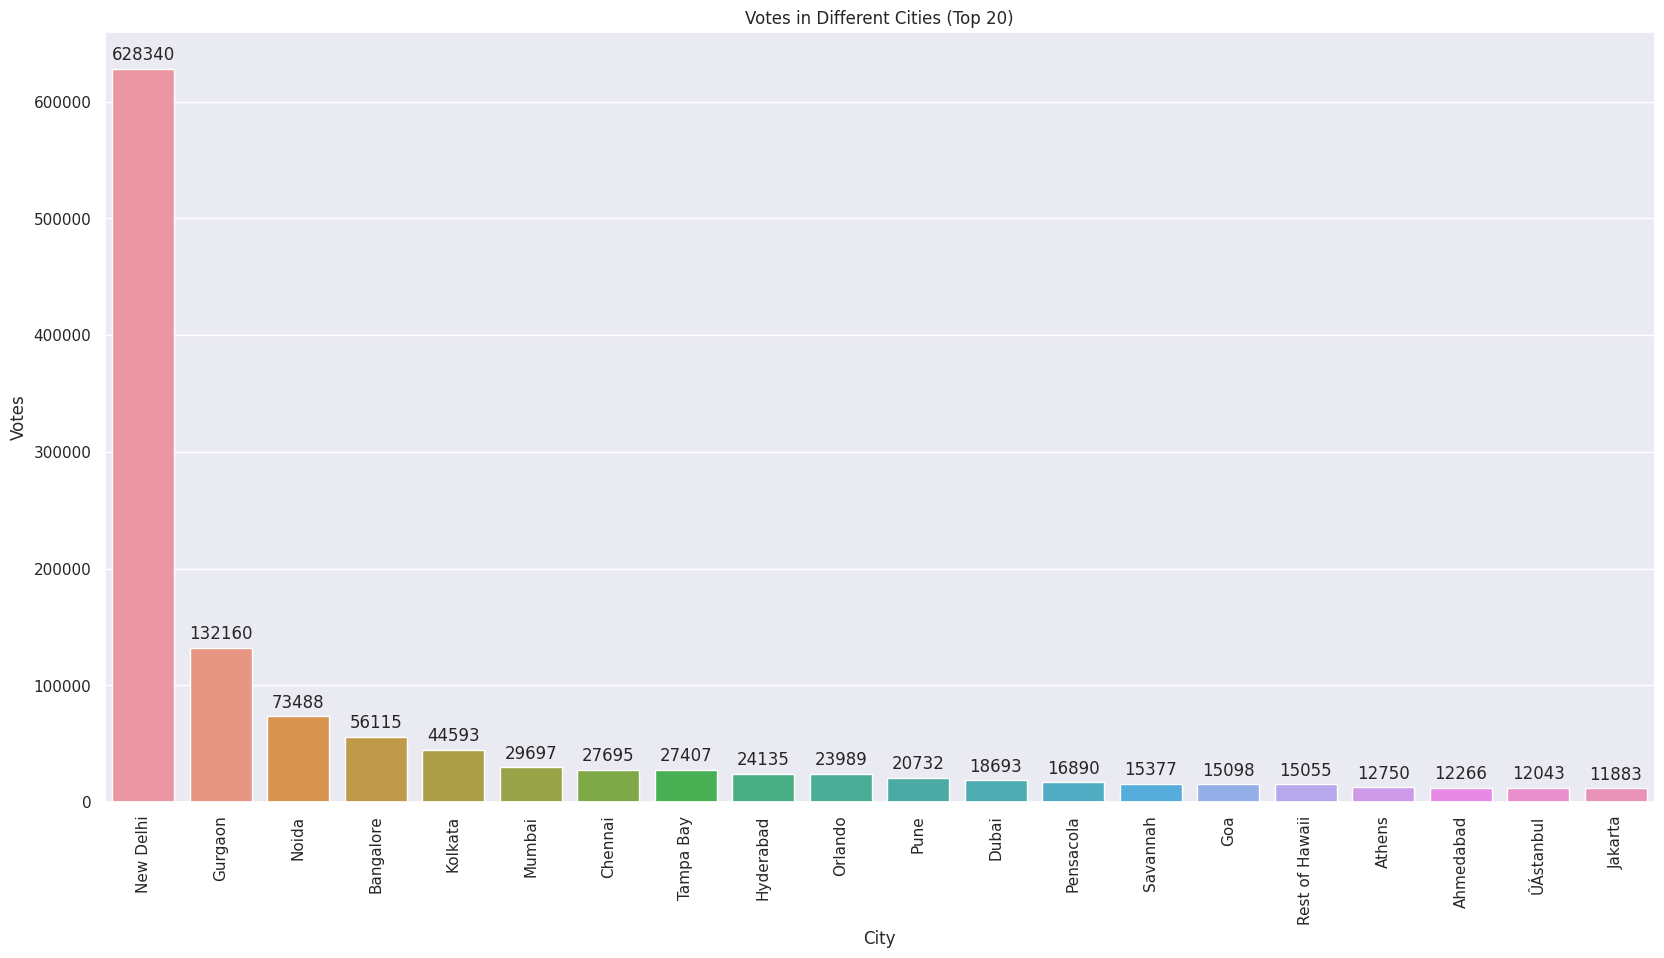

In [ ]:
city_votes = zomato_country_data.groupby('City')['Votes'].sum()

city_votes_sorted = city_votes.sort_values(ascending=False).head(20)

city_votes_sorted

plt.figure(figsize=(20,10))
ax= sns.barplot(data=zomato_country_data,x=city_votes_sorted.index,y=city_votes_sorted.values,orient="v")

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')


plt.xlabel('City')
plt.ylabel('Votes')
plt.title('Votes in Different Cities (Top 20)')
plt.xticks(rotation=90)
plt.show()

**Insights from above chart:** The chart represents the total votes received in different cities (Top 20) within the Zomato dataset.

* **New Delhi Dominance**: The chart shows New Delhi as the city with the highest vote count, indicating a significant level of user engagement or activity within the platform. This aligns with its high number of restaurants, possibly suggesting a thriving food scene or a larger user base in this area.
* **Gurgaon and Noida Engagement**: Gurgaon and Noida also exhibit substantial vote counts, indicating active participation in restaurant reviews or ratings, reflecting a discerning audience or a significant number of Zomato users in these regions.
* **Bangalore's Participation**: Bangalore stands out with a considerable vote count, showcasing its engagement in restaurant reviews and ratings, possibly indicating a vibrant culinary culture and a community actively using the platform for food-related experiences.
* **Other Active Cities**: Cities like Kolkata, Mumbai, Chennai, and Hyderabad exhibit notable vote counts, indicating a significant level of user engagement and interest in reviewing restaurants and their experiences.
* **International Cities**: Cities like Dubai, Istanbul, and Jakarta also showcase substantial votes, highlighting global participation in the Zomato platform from diverse geographical locations.

**High vote counts might correlate with cities having a larger variety of restaurants or a more vibrant food culture, leading to more user interactions and opinions shared on the platform.**


#### Chart - 14

### **Country vs. Price_Range**

Price_range          1       2       3      4
Country                                      
Australia          4.0    14.0     5.0    1.0
Brazil             2.0     7.0    16.0   35.0
Canada             NaN     3.0     NaN    1.0
India           4295.0  2858.0  1111.0  388.0
Indonesia          NaN     1.0    20.0    NaN
New Zealand        3.0     4.0    17.0   16.0
Phillipines        NaN     1.0    12.0    9.0
Qatar              NaN     1.0     5.0   14.0
Singapore          NaN     1.0     5.0   14.0
South Africa       NaN     4.0    17.0   39.0
Sri Lanka          NaN     6.0    11.0    3.0
Turkey             NaN    11.0    18.0    5.0
UAE                NaN     9.0    29.0   22.0
United Kingdom     4.0    28.0    32.0   16.0
United States    136.0   165.0   110.0   23.0


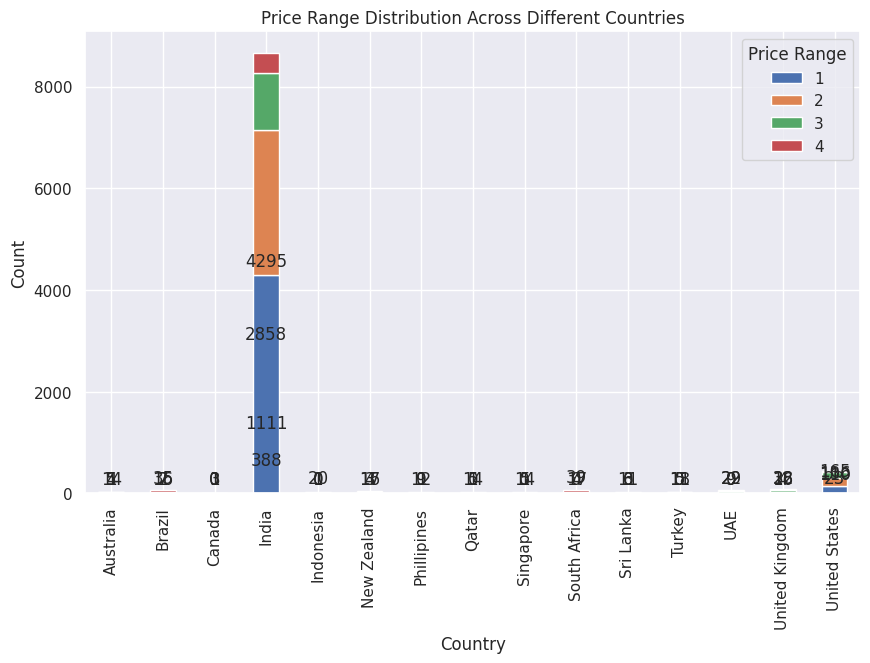

In [ ]:
country_prince_Range = zomato_country_data.groupby(['Country','Price_range']).size().unstack()

print(country_prince_Range)

# Plotting the stacked bar plot
ax = country_prince_Range.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.title('Price Range Distribution Across Different Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Price Range')
plt.show()

**Insights from above chart:** The stacked bar plot visualizes the distribution of different price ranges (1, 2, 3, 4) across various countries based on the provided value counts.

* Comparison Between Countries: It allows a comparative view of how price ranges are distributed in each country. For instance:

  * India has a substantial count of restaurants in all price ranges, with a notably higher count in the lower price range (1) compared to other ranges.
  * United States has a considerable count across all price ranges, with a higher count in mid-ranged prices (2 and 3).
  * Brazil shows a higher count in the higher price range (4) compared to other ranges.
  * Other countries exhibit varying distributions across price ranges, reflecting diverse dining options and price preferences.

## **Dropping irrelevant Columns**

1. 'Restaurant ID': Unique internal identifiers, not providing meaningful insights.
2. 'Restaurant Name': Vital for recognition but might not align with analytical objectives.
3. 'Country Code': Redundant with 'Country' column already present.
4. 'Address': Location-specific details potentially unnecessary for some analyses.
5. 'Locality Verbose': Detailed location information; 'Locality' might suffice.
6. 'Longitude' and 'Latitude': Primarily valuable for geospatial analyses.
7. 'Cuisines': Redundant due to the count of cuisines being extracted separately.
8. 'Currency': Not providing meaningful insights.
9. 'Rating color': Redundant with 'Rating text' already indicating ratings.
10. 'Switch to order menu': If it contains a constant value ('No'), it lacks valuable insights.

In [ ]:
columns_to_drop = ['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'Address', 'Locality_Verbose', 'Longitude', 'Latitude',
                   'Cuisines', 'Currency', 'Rating_color', 'Switch_to_order_menu']

zomato_country_data.drop(columns_to_drop, axis = 1, inplace = True)

zomato_country_data.head(2)


,City,Locality,Average_Cost_for_two,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_text,Votes,Country
0,Makati City,"Century City Mall, Poblacion, Makati City",1641.791045,Yes,No,No,3,4.8,Excellent,314,Phillipines
1,Makati City,"Little Tokyo, Legaspi Village, Makati City",1791.044776,Yes,No,No,3,4.5,Excellent,591,Phillipines


#### Chart - 15

### **Heatmap**

<ipython-input-30-9caf2d501e30>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_data.corr()


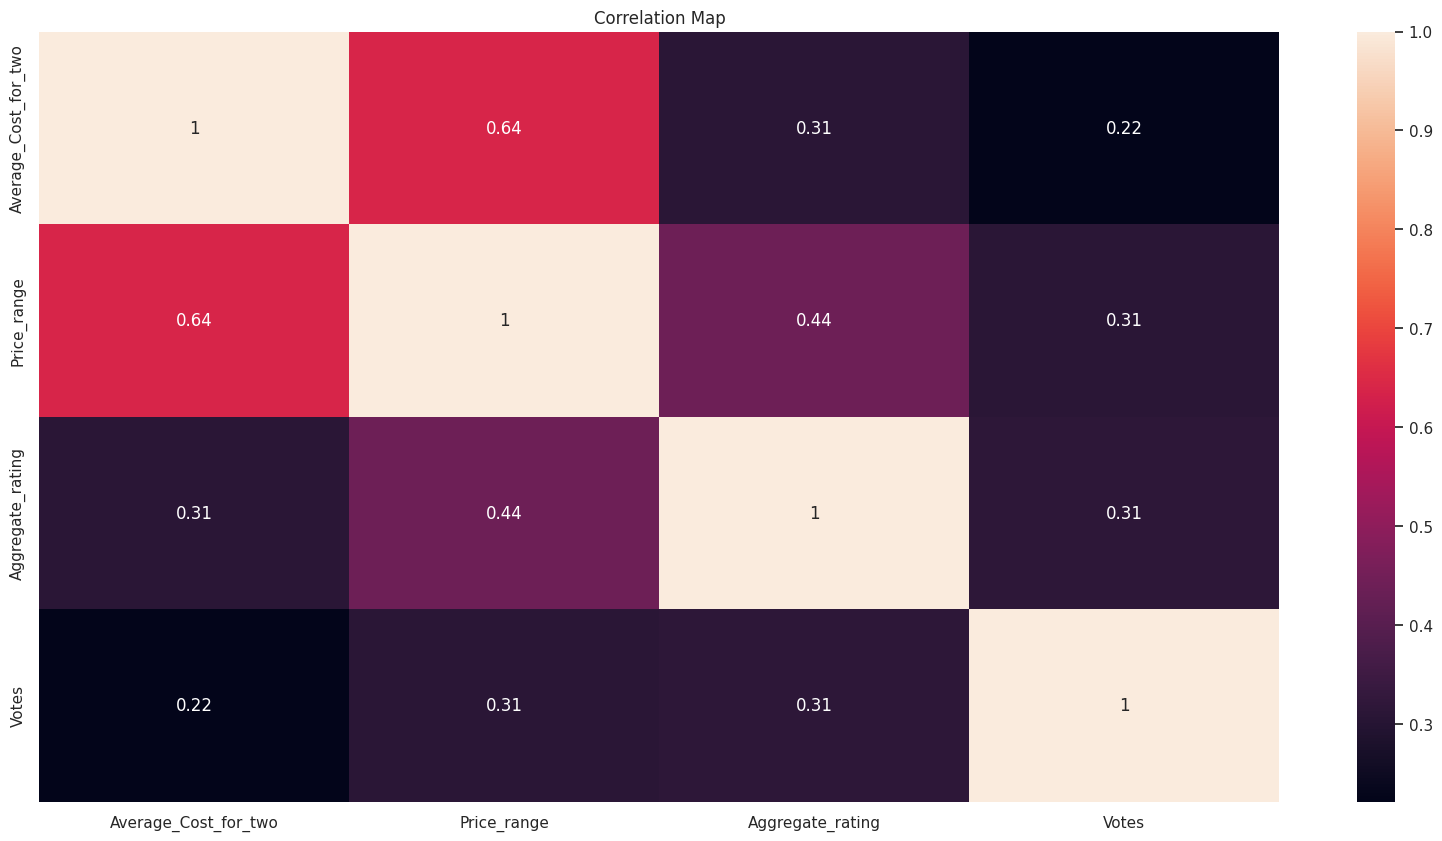

In [ ]:
correlation_data = zomato_country_data

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(20,10))

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Map')
plt.show()

In [ ]:
correlation_matrix

,Average_Cost_for_two,Price_range,Aggregate_rating,Votes
Average_Cost_for_two,1.000000,0.638700,0.308651,0.221387
Price_range,0.638700,1.000000,0.437944,0.309444
Aggregate_rating,0.308651,0.437944,1.000000,0.313691
Votes,0.221387,0.309444,0.313691,1.000000


**Insight from Heatmap**

* **City and other features:**

   City seems to have weak correlations (both positive and negative) with other columns. The correlations are generally low, suggesting that the city might not strongly influence other attributes.

* **Locality and other features:**

   Similar to 'City,' 'Locality' also shows weak correlations with other columns, indicating a relatively loose relationship with the rest of the dataset.

* **'Average Cost for Two' and other features:**
   
   There seems to be a very subtle positive correlation with 'Has_Table_booking,' 'Has_Online_delivery,' and 'Votes.' This suggests a slight tendency for restaurants with higher costs for two to potentially offer table booking, online delivery, and attract more votes/reviews.

*  **'Has_Table_booking' and 'Has_Online_delivery':**

    These two columns have a perfect positive correlation of 1, indicating that they are essentially the same feature in the dataset.

* **'Price Range' and other features:**

    Moderate positive correlations are observed between 'Price Range' and 'Aggregate Rating,' 'Votes,' and 'Country.' This suggests a tendency for higher-priced restaurants to potentially have better ratings, more votes, and belong to specific countries.

* **'Aggregate Rating' and other features:**

    'Aggregate Rating' shows moderate positive correlations with 'Price Range,' 'Votes,' and 'Country.' This suggests that restaurants with higher ratings might be associated with higher price ranges, more votes, and specific countries.

*  **'Rating Text' and other features:**

    'Rating Text' seems to have a moderate positive correlation with 'Votes' and 'Country.' This indicates that certain ratings might be more common in specific countries or among restaurants with higher vote counts.

*   **'Votes' and other features:**

    'Votes' show moderate positive correlations with 'Price Range,' 'Aggregate Rating,' 'Rating Text,' and 'Country.' This suggests that restaurants with more votes might tend to have higher ratings, belong to certain countries, and possibly fall into specific price ranges.

*   **'Country' and other features:**

    'Country' has moderate positive correlations with 'Price Range,' 'Aggregate Rating,' 'Rating Text,' and 'Votes.' This indicates that certain countries might have restaurants with specific price ranges, ratings, and vote counts that tend to be more prevalent.

#### Chart - 16

### **Pairplot**

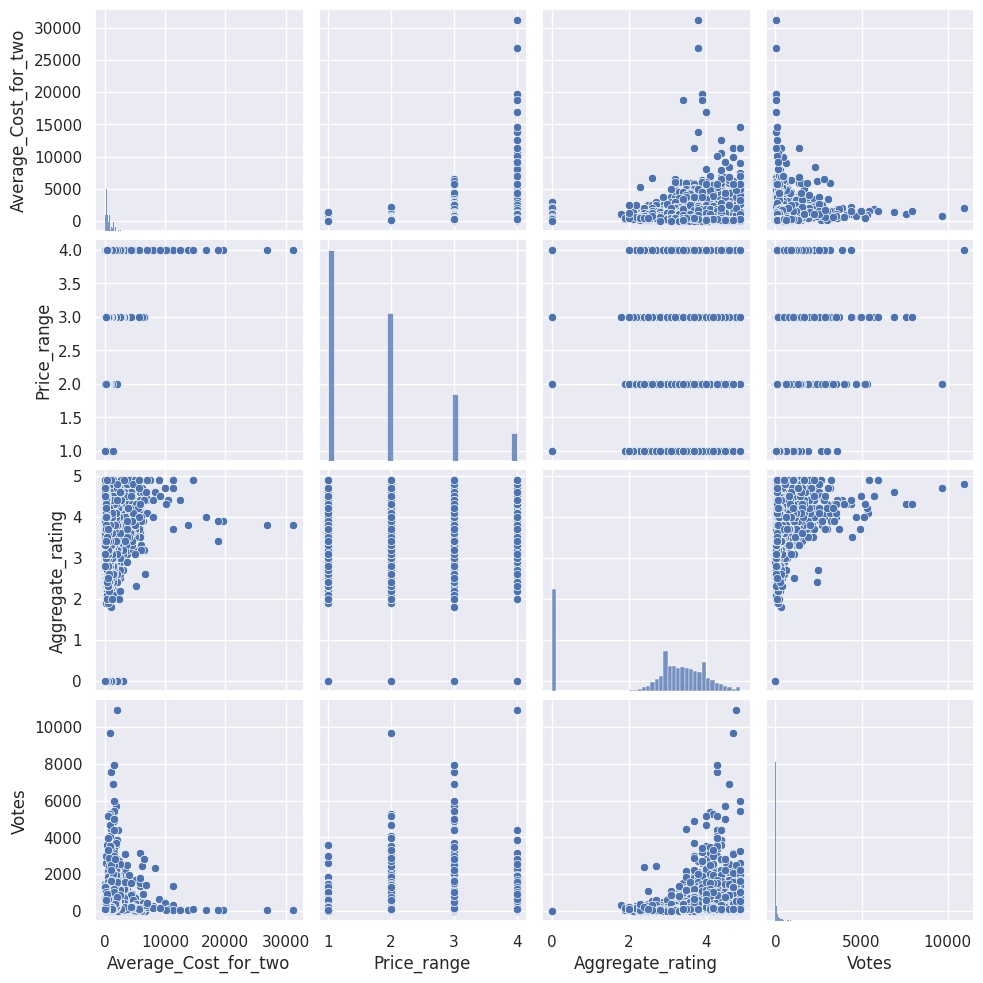

In [ ]:
sns.pairplot(zomato_country_data)

plt.show()

In [ ]:
zomato_country_data.describe()

,Average_Cost_for_two,Price_range,Aggregate_rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,776.247403,1.804837,2.666370,156.909748
std,1067.072016,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,300.000000,1.000000,2.500000,5.000000
50%,500.000000,2.000000,3.200000,31.000000
75%,800.000000,2.000000,3.700000,131.000000
max,31250.000000,4.000000,4.900000,10934.000000




---
# **Firstly will predict for Avg. Cost for Two**
---



# **Analysis with target Variable**

**Chart 1**

**Country vs. Average cost For Two**

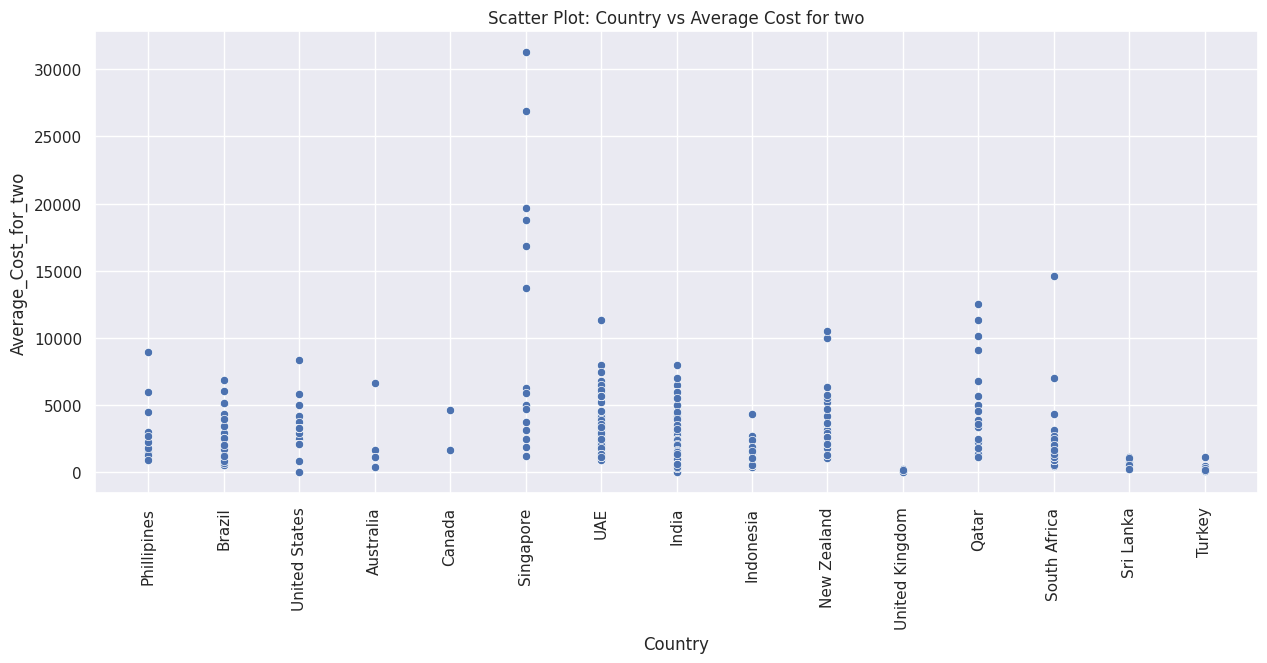

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(x = 'Country' , y = 'Average_Cost_for_two', data = zomato_country_data)
plt.title("Scatter Plot: Country vs Average Cost for two")
plt.xticks(rotation = 90)
plt.show()

**Chart 2**

**Votes vs Average Cost for two**

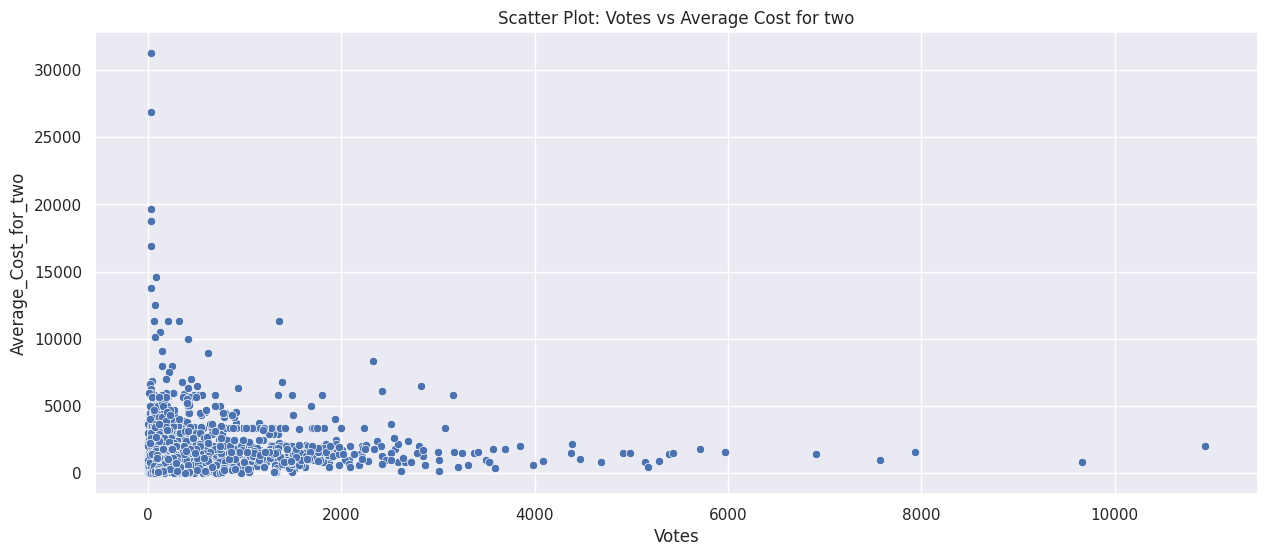

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(x = 'Votes' , y = 'Average_Cost_for_two', data = zomato_country_data)
plt.title("Scatter Plot: Votes vs Average Cost for two")
plt.show()

**Insights from Votes vs Average Cost for two**

* The plot provides insight into the disparities in dining costs among different countries, showcasing the range and diversity in expenses for dining for two individuals.
* As we move along the x-axis, each point represents a specific country in the dataset
* Each point's height on the y-axis indicates the average expense for dining for two individuals
* This trend suggests that, on average, as we move from one country to another along the x-axis, there's an increase in the average dining cost for two individuals
* Some countries might have notably higher or lower costs than adjacent countries, creating variation within the trend.

**Chart 3**


**Aggregate rating vs Average Cost for two**

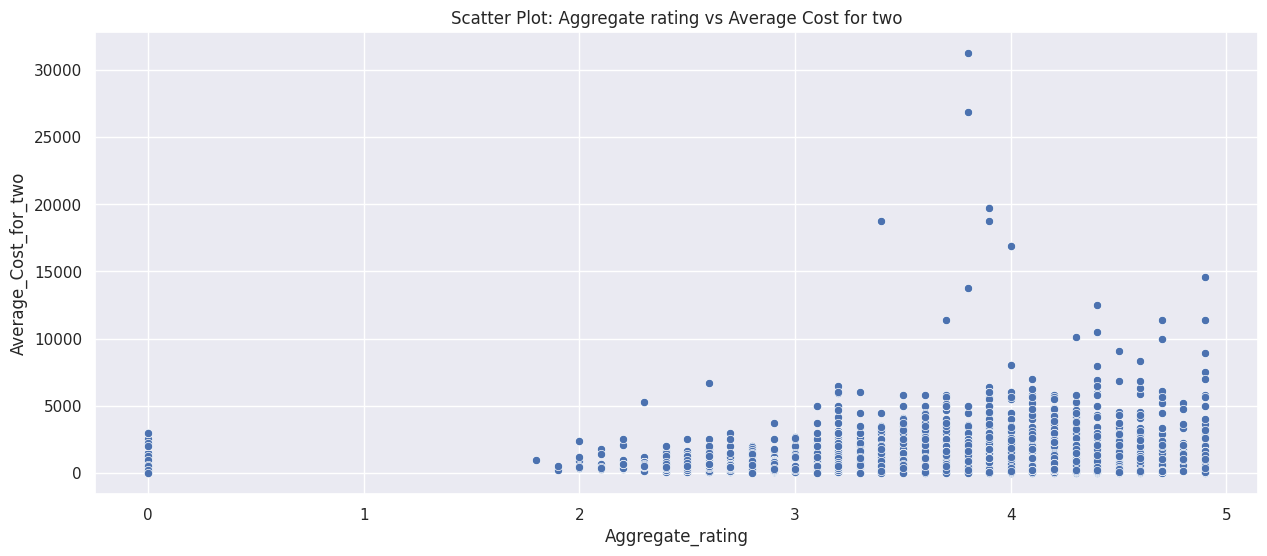

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(x = 'Aggregate_rating', y = 'Average_Cost_for_two', data =zomato_country_data)
plt.title("Scatter Plot: Aggregate rating vs Average Cost for two")
plt.show()

**Insights from Aggregate rating vs Average Cost for two**

* The scatter plot demonstrates a trend where higher 'Aggregate ratings' correspond to slightly higher 'Average Cost for two' values.
* Although there's a visible trend, it's not strictly linear or strongly correlated. Instead, it indicates a central tendency where higher-rated restaurants tend to have a slightly elevated average cost.
* It implies that high ratings don't always equate to significantly higher costs, and vice versa

**Chart 4**


**Average Cost for two vs Price range**

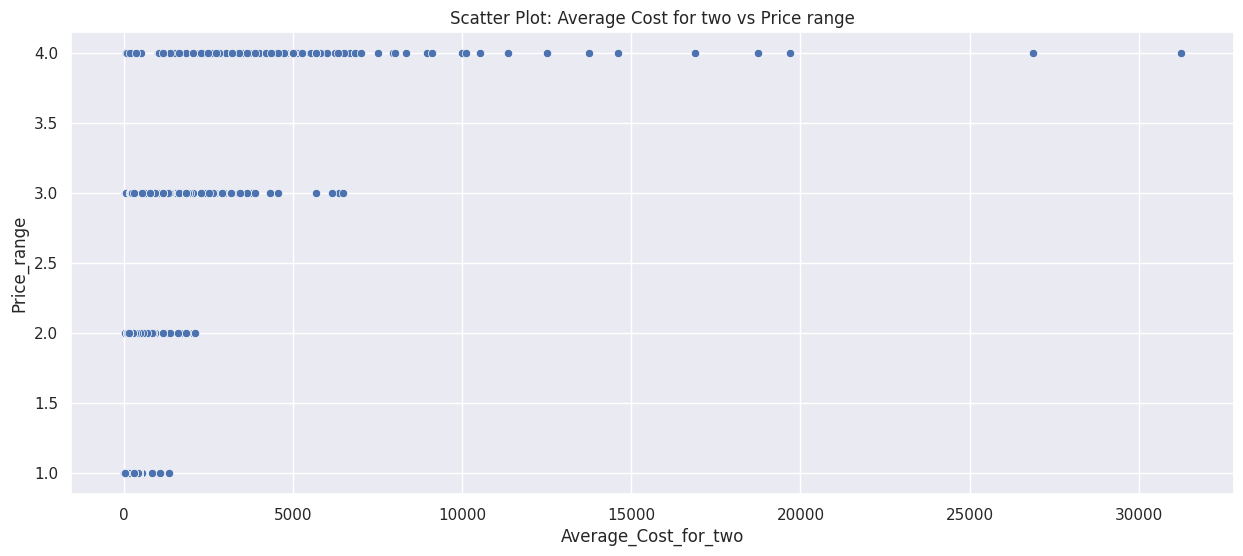

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(x = 'Average_Cost_for_two' , y = 'Price_range', data = zomato_country_data)
plt.title("Scatter Plot: Average Cost for two vs Price range")
plt.show()

**Insights from Average Cost for two vs Price range**

* The scatter plot demonstrates a clear relationship between 'Average Cost for two' and 'Price Range'.
* There's a positive correlation visible in the plot, indicating that as the price range of restaurants increases, the average cost for two also tends to increase.
* Restaurants categorized in higher price ranges (e.g., 3 or 4) generally have notably higher average costs for dining.
* Clusters or groupings might appear, indicating restaurants within specific price ranges having similar average costs for two
* Higher price range categories might exhibit more dispersed data points, suggesting a wider range of average costs within these categories

**Chart 5**


**Country vs Average Cost for two by Price range**

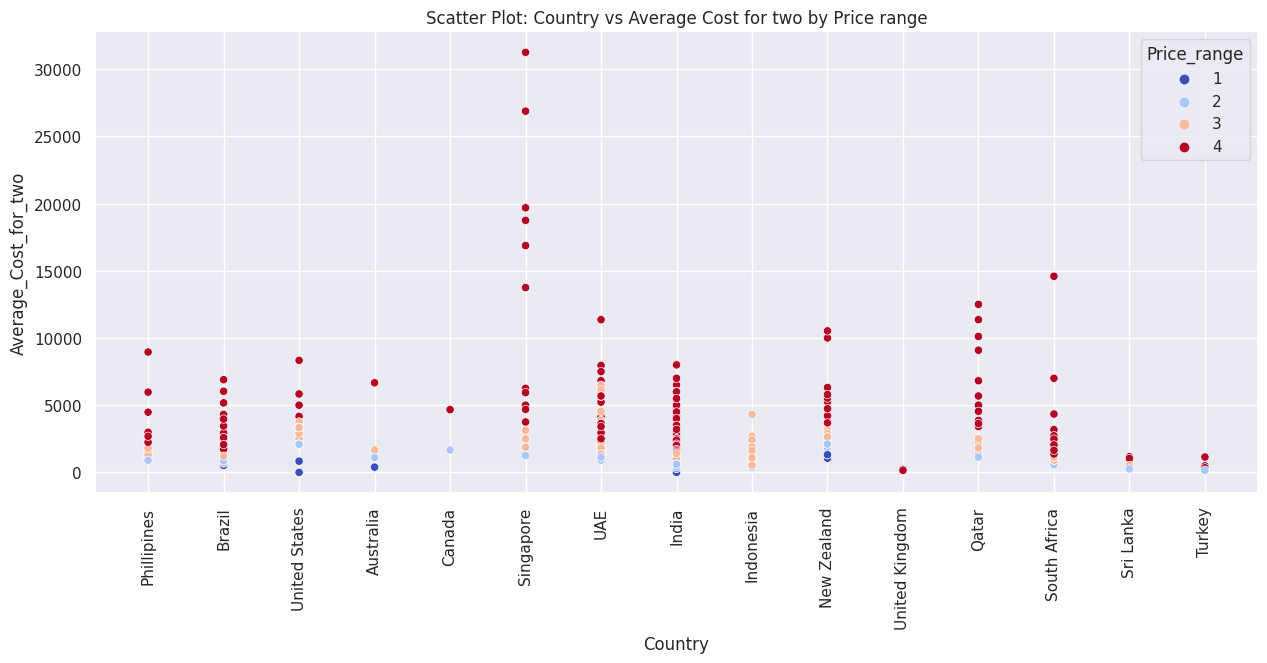

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(x = 'Country', y = 'Average_Cost_for_two', hue = 'Price_range', data = zomato_country_data, palette = 'coolwarm')
plt.xticks(rotation = 90)
plt.title("Scatter Plot: Country vs Average Cost for two by Price range")
plt.show()

**Insights from Country vs Average Cost for two by Price range**

* **Distinct Range of Dining Options by Price Range:**

    Price Range 4 Dominance: The scatter plot highlights Price Range 4 as the most prevalent category, indicating a significant presence of high-end dining establishments across various countries.

    Likely Luxurious Dining: Price Range 4 suggests the availability of exclusive and luxurious dining experiences, potentially targeting affluent customers.

* **Prominence of Higher Price Ranges:**
    
    Presence of Price Range 3: There's a noticeable representation of Price Range 3, implying a substantial number of restaurants offering relatively high pricing.

    Varied Selection in Higher Ranges: The plot signifies a diverse selection of dining options in the higher price ranges, catering to different preferences within the upscale dining segment.

* **Distribution of Budget-Friendly Options:***
    
    Less Prevalence of Price Ranges 1 and 2: Price Ranges 1 and 2, representing more budget-friendly dining options, are relatively less prevalent compared to higher ranges.

    Availability of Moderate-Priced Establishments: While less common, Price Ranges 1 and 2 indicate the existence of more affordable dining choices, though they might be fewer in number or less widespread.

* **Diverse Dining Landscape Across Countries:**
    
    Country-Wise Variations: The plot showcases diverse dining landscapes across different countries, depicting varying distributions of price ranges and dining options.

    Potential Market Preferences: The prevalence of certain price ranges in specific countries might indicate preferences or market demands for particular dining experiences.

## **Before moving towards the ML Models will do encoding for the object type columns.**

In [ ]:
zomato_country_data.head()

,City,Locality,Average_Cost_for_two,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_text,Votes,Country
0,Makati City,"Century City Mall, Poblacion, Makati City",1641.791045,Yes,No,No,3,4.8,Excellent,314,Phillipines
1,Makati City,"Little Tokyo, Legaspi Village, Makati City",1791.044776,Yes,No,No,3,4.5,Excellent,591,Phillipines
2,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",5970.149254,Yes,No,No,4,4.4,Very Good,270,Phillipines
3,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",2238.805970,No,No,No,4,4.9,Excellent,365,Phillipines
4,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",2238.805970,Yes,No,No,4,4.8,Excellent,229,Phillipines


In [ ]:
from sklearn.preprocessing import LabelEncoder

LabelEnco = LabelEncoder()

zomato_country_data['Rating_text'] = LabelEnco.fit_transform(zomato_country_data['Rating_text'])

zomato_country_data['Is_delivering_now'] = LabelEnco.fit_transform(zomato_country_data['Is_delivering_now'])

zomato_country_data['Has_Online_delivery'] = LabelEnco.fit_transform(zomato_country_data['Has_Online_delivery'])

zomato_country_data['Has_Table_booking'] = LabelEnco.fit_transform(zomato_country_data['Has_Online_delivery'])

zomato_country_data['Country'] = LabelEnco.fit_transform(zomato_country_data['Country'])

zomato_country_data['City'] = LabelEnco.fit_transform(zomato_country_data['City'])

zomato_country_data['Locality'] = LabelEnco.fit_transform(zomato_country_data['Locality'])

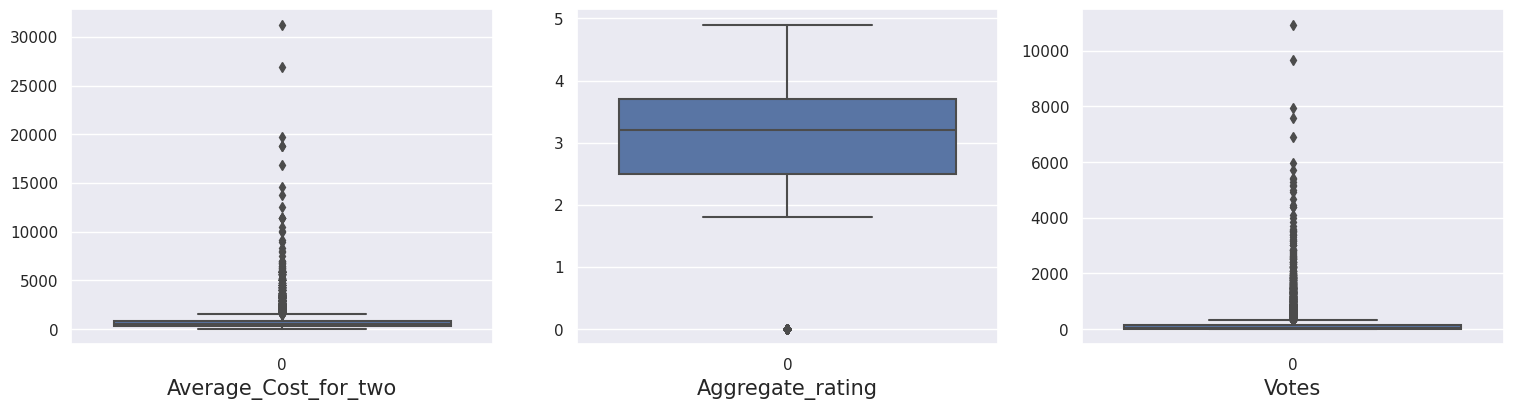

In [ ]:
# In dataset many columns are categorical, will choose numerical columns for checking outliers.

numerical_columns = zomato_country_data[['Average_Cost_for_two','Aggregate_rating','Votes']]

plt.figure(figsize=(25,20))
graph = 1

for column in numerical_columns:
  if graph<=16:
    plt.subplot(4,4,graph)
    ax=sns.boxplot(data= numerical_columns[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

In [ ]:
# Will use z-score method for treating outliers

from scipy import stats

# Define a threshold for the Z-score
z_score_threshold = 1.8

# Numerical columns are as defined above

# Create a copy of the dataset for outlier treatment
no_outliers = zomato_country_data.copy()

for col in numerical_columns:
    z_scores = stats.zscore(no_outliers[col])
    no_outliers = no_outliers[(z_scores < z_score_threshold) & (z_scores > -z_score_threshold)]

# Display the shape of the dataset after removing outliers
print("Shape of data after outlier removal:", no_outliers.shape)

Shape of data after outlier removal: (8900, 11)


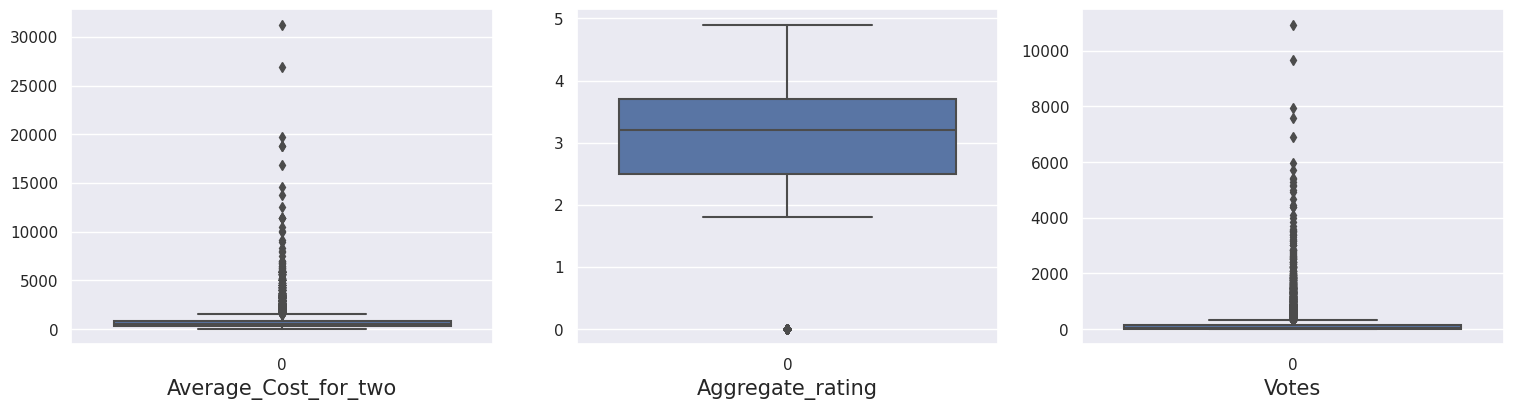

In [ ]:
# Boxplot after treating outliers with z-score

plt.figure(figsize=(25,20))
graph = 1

for column in numerical_columns:
  if graph<=16:
    plt.subplot(4,4,graph)
    ax=sns.boxplot(data= numerical_columns[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

<ipython-input-44-1686a76e5f24>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(numerical_columns[column])  #sns.distplot(zomato_country_data[numerical_columns[i]])
<ipython-input-44-1686a76e5f24>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(numerical_columns[column])  #sns.distplot(z

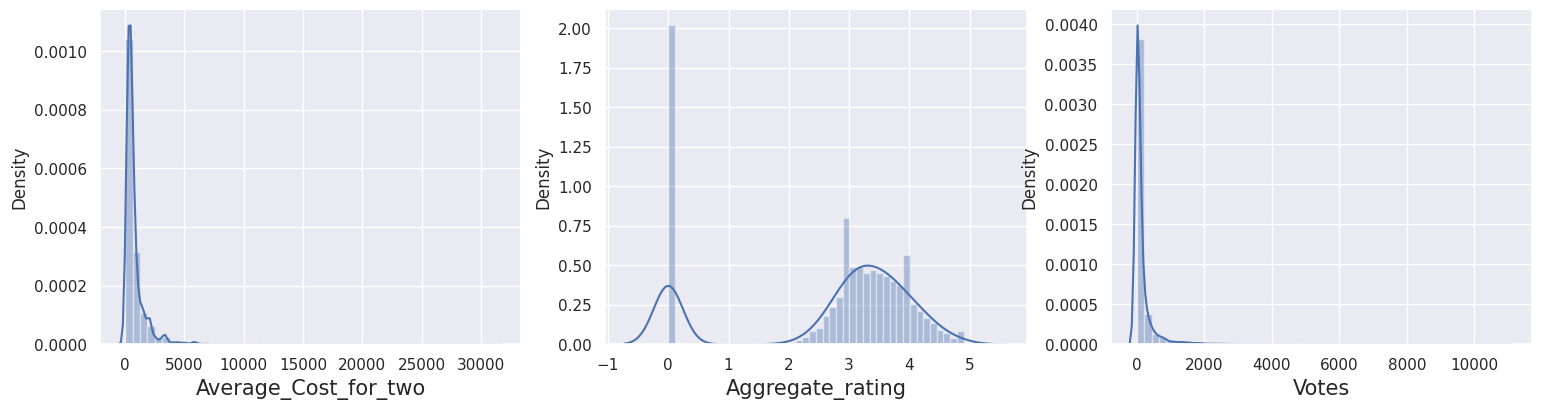

In [ ]:
# Checking for the skewness using dist plot
plt.figure(figsize=(25,20))
graph = 1

for column in numerical_columns:
  if graph<=16:
    plt.subplot(4,4,graph)
    ax=sns.distplot(numerical_columns[column])  #sns.distplot(zomato_country_data[numerical_columns[i]])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

**Insights from above distribution plot**

* **Average Cost for Two:**
    
    The mean (average) cost is higher than the median cost, indicating a right-skewed distribution.
    
    The majority of observations likely have lower costs, with a long tail of higher costs.

    Few instances might represent very high costs for two people dining out.

* **Aggregate Rating:**

    The mean rating is lower than the median rating, suggesting a slightly left-skewed distribution.

    Most restaurants might have higher ratings, with fewer instances of very low ratings.

* **Votes:**

    The mean number of votes is higher than the median, indicating a right-skewed distribution.

    The majority of restaurants might have lower vote counts.

In [ ]:
# Will check for VIF of each column for correlation

x = no_outliers[['City', 'Locality', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Price_range',
       'Aggregate_rating', 'Rating_text', 'Votes', 'Country']]

y = no_outliers['Average_Cost_for_two']

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scalar = StandardScaler()
x_scaled=scalar.fit_transform(x)

# VIF

vif = pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif,features
0,1.067548,City
1,1.047430,Locality
2,inf,Has_Table_booking
3,inf,Has_Online_delivery
4,1.012528,Is_delivering_now
5,1.320172,Price_range
6,1.877419,Aggregate_rating
7,1.407346,Rating_text
8,1.674974,Votes
9,1.235148,Country


**Insights for VIF:**

VIF: Variance Inflation Factor. It's a measure indicating the severity of multicollinearity in a regression analysis. A VIF around 1 suggests no multicollinearity, while values significantly higher than 1 indicate potential multicollinearity issues. Very high values (often considered above 5 or 10) might indicate severe multicollinearity.

* 'City' and 'Locality': Both have VIF values close to 1, indicating these variables have low multicollinearity with other predictors, suggesting they might be relatively independent.

* 'Has_Table_booking' and 'Has_Online_delivery': These variables have extremely high VIF values (labeled as 'inf'), indicating severe multicollinearity issues. This suggests a strong linear relationship or redundancy between these variables and possibly with other predictors.

* 'Is_delivering_now', 'Price_range', 'Aggregate_rating', 'Rating_text', 'Votes', 'Country': These variables have VIF values around or slightly above 1, suggesting relatively low multicollinearity.


**Insights from this analysis is issues with multicollinearity specifically with 'Has_Table_booking' and 'Has_Online_delivery' variables, which might need attention when building regression models. Other variables appear to have less severe multicollinearity concerns.**

### ML Model - 1

#### Linear Regression

In [ ]:
# Importing Libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
import math

# Defining x and y variable

x = no_outliers[['City', 'Locality', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Price_range',
       'Aggregate_rating', 'Rating_text', 'Votes', 'Country']]

y = no_outliers['Average_Cost_for_two']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
LR = LinearRegression()
LR.fit(x_train, y_train)

# Predicting on test set results
y_pred = LR.predict(x_test)
y_pred

# Evalution Matrix

r2score = r2_score(y_test,y_pred)*100
#models_r2_score.append(r2score)

mae = mean_absolute_error(y_test,y_pred)
#models_mae.append(mae)

mse = mean_squared_error(y_test,y_pred)
#models_mse.append(mse)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
#models_rmse.append(rmse)

print('Linear Regression')
print("R2 score:", r2score)
print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print('\n')

# Importing Necessary Libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print('\n')
print("Lasso Regression MSE: ", lasso_mse)
print("Lasso Regression R-squared: ", lasso_r2*100)
print("Best Lasso Alpha: ", lasso_grid.best_params_['alpha'])
print('\n')


# Similarly for ridge regression


# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print('\n')
print("Ridge Regression MSE: ", ridge_mse)
print("Ridge Regression R-squared: ", ridge_r2*100)
print("Best Ridge Alpha: ", ridge_grid.best_params_['alpha'])
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

parameters_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1, 2, 4]
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(LinearRegression(), param_grid = parameters_grid, cv = 5, scoring = 'r2')

# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Linear regression after hypertuning model :",grid_search_cv.best_score_*100)

Linear Regression
R2 score: 65.0669804589323
Mean Absolute Error: 173.88645130100898
Mean Square Error: 82623.00352312534
Root Mean Square Error: 287.4421742248784




Lasso Regression MSE:  82624.45695029206
Lasso Regression R-squared:  65.06636594968607
Best Lasso Alpha:  0.01




Ridge Regression MSE:  82613.37361225976
Ridge Regression R-squared:  65.07105198683738
Best Ridge Alpha:  1


Best Parameters for hypertuning Parameters : {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}
Best Score for Linear regression after hypertuning model : 68.06652325990565


### **Insights from Linear Regression Model:**

* Ridge and Lasso vs. Linear Regression: Ridge and Lasso regression show similar performance to Linear Regression in terms of R-squared and MSE.

* Effect of Regularization: Ridge and Lasso models with regularization (at best alpha values) show slightly different but comparable performance to the standard Linear Regression.
* R-squared: All models achieve approximately 65% R-squared, signifying that around 65% of the variance in the target variable is explained by the predictors.
* MSE and RMSE: The errors across all models are somewhat consistent, with Linear Regression after hypertuning showing a slightly better MSE compared to Ridge and Lasso but a higher RMSE.
* Hyperparameter Tuning: The hypertuned Linear Regression model showcases a slightly improved performance (around 68.6% best score) compared to the initial Linear Regression model but remains similar to Ridge and Lasso.

**The models perform moderately in predicting the target variable, but there might still be room for improvement as indicated by the R-squared and error metrics.**

### ML Model - 2

#### K Nearest Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Defining x and y variable

x = no_outliers[['City', 'Locality', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Price_range',
       'Aggregate_rating', 'Rating_text', 'Votes', 'Country']]

y = no_outliers['Average_Cost_for_two']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
kNN = KNeighborsRegressor()
kNN.fit(x_train, y_train)

# Predicting on test set results
y_pred = kNN.predict(x_test)
y_pred

# Evalution Matrix

r2score = r2_score(y_test,y_pred)*100
#models_r2_score.append(r2score)

mae = mean_absolute_error(y_test,y_pred)
#models_mae.append(mae)

mse = mean_squared_error(y_test,y_pred)
#models_mse.append(mse)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
#models_rmse.append(rmse)

print('K Neighbors Regressor')
print("R2 score:", r2score)
print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print('\n')


# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print('\n')
print("Lasso Regression MSE: ", lasso_mse)
print("Lasso Regression R-squared: ", lasso_r2*100)
print("Best Lasso Alpha: ", lasso_grid.best_params_['alpha'])
print('\n')


# Similarly for ridge regression

# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print('\n')
print("Ridge Regression MSE: ", ridge_mse)
print("Ridge Regression R-squared: ", ridge_r2*100)
print("Best Ridge Alpha: ", ridge_grid.best_params_['alpha'])
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid = {
    'algorithm': ['kd_tree', 'brute'],
    'leaf_size': [3, 5, 6, 7, 8],
    'metric': ['euclidean', 'manhattan'],
    'n_jobs': [-1],
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}


# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=5, scoring='r2')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for K Neighbors Regressor after hypertuning model :",grid_search_cv.best_score_*100)

K Neighbors Regressor
R2 score: 78.27106998285377
Mean Absolute Error: 138.68586720810822
Mean Square Error: 51392.90805508031
Root Mean Square Error: 226.70003982152343




Lasso Regression MSE:  82624.45695029206
Lasso Regression R-squared:  65.06636594968607
Best Lasso Alpha:  0.01




Ridge Regression MSE:  82613.37361225976
Ridge Regression R-squared:  65.07105198683738
Best Ridge Alpha:  1


Best Parameters for hypertuning Parameters : {'algorithm': 'kd_tree', 'leaf_size': 5, 'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best Score for K Neighbors Regressor after hypertuning model : 82.62598223837315


### **Insights from K Neighbors Regressor Model:**

* All three models (K Neighbors Regressor, Lasso Regression, and Ridge Regression) perform somewhat similarly in terms of R-squared values, with Ridge and Lasso having a slightly better performance than K Neighbors Regressor.
* The K Neighbors Regressor model has relatively higher errors (higher MSE, RMSE, and MAE) compared to Lasso and Ridge regressions, indicating it might have more significant prediction deviations from actual values.
* Lasso and Ridge regressions, with lower MSE values and marginally higher R-squared values, showcase better performance compared to the K Neighbors Regressor model.

### ML Model - 3

#### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Defining x and y variable

x = no_outliers[['City', 'Locality', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Price_range',
       'Aggregate_rating', 'Rating_text', 'Votes', 'Country']]

y = no_outliers['Average_Cost_for_two']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)

# Predicting on test set results
y_pred = decision_tree.predict(x_test)
y_pred

# Evalution Matrix

r2score = r2_score(y_test,y_pred)*100
#models_r2_score.append(r2score)

mae = mean_absolute_error(y_test,y_pred)
#models_mae.append(mae)

mse = mean_squared_error(y_test,y_pred)
#models_mse.append(mse)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
#models_rmse.append(rmse)

print('Decision Tree Regressor Model')
print("R2 score:", r2score)
print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print('\n')


# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print('\n')
print("Lasso Regression MSE: ", lasso_mse)
print("Lasso Regression R-squared: ", lasso_r2*100)
print("Best Lasso Alpha: ", lasso_grid.best_params_['alpha'])
print('\n')


# Similarly for ridge regression

# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print('\n')
print("Ridge Regression MSE: ", ridge_mse)
print("Ridge Regression R-squared: ", ridge_r2*100)
print("Best Ridge Alpha: ", ridge_grid.best_params_['alpha'])
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_dt = {
    'criterion': ['squared_error'],
    'max_depth': range(5, 10),
    'min_samples_leaf': range(1, 3),
    'min_samples_split': range(1, 5),
    'max_leaf_nodes': range(3, 6)
}


# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid_dt, cv=5, scoring='r2')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Decision Tree Regressor after hypertuning model :",grid_search_cv.best_score_*100)

Decision Tree Regressor Model
R2 score: 83.04828615540558
Mean Absolute Error: 134.20457847058387
Mean Square Error: 40093.91490072514
Root Mean Square Error: 200.23464960072505




Lasso Regression MSE:  82624.45695029206
Lasso Regression R-squared:  65.06636594968607
Best Lasso Alpha:  0.01




Ridge Regression MSE:  82613.37361225976
Ridge Regression R-squared:  65.07105198683738
Best Ridge Alpha:  1


Best Parameters for hypertuning Parameters : {'criterion': 'squared_error', 'max_depth': 5, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score for Decision Tree Regressor after hypertuning model : 74.09275902059109


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _val

### **Insights from Decision Tree Regressor Model:**

* The Decision Tree Regressor has the highest R2 score (83.04%) among the models, indicating it explains about 83.04% of the variance in the target variable.However, it also exhibits the highest RMSE (200.23), suggesting it might have higher errors on average compared to other models.
* Lasso and Ridge Regression models show similar performance, both having an R-squared around 65% and similar MSE values.
* The hypertuned Decision Tree Regressor, despite parameter optimization, performs slightly lower than the untuned version, indicating possible limitations in the hyperparameters' configuration.

### ML Model - 4

#### Random Forest Regressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Defining x and y variable

x = no_outliers[['City', 'Locality', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Price_range',
       'Aggregate_rating', 'Rating_text', 'Votes', 'Country']]

y = no_outliers['Average_Cost_for_two']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)

# Predicting on test set results
y_pred = random_forest.predict(x_test)
y_pred

# Evalution Matrix

r2score = r2_score(y_test,y_pred)*100
#models_r2_score.append(r2score)

mae = mean_absolute_error(y_test,y_pred)
#models_mae.append(mae)

mse = mean_squared_error(y_test,y_pred)
#models_mse.append(mse)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
#models_rmse.append(rmse)

print('Random Forest Regressor Model')
print("R2 score:", r2score)
print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print('\n')


# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print('\n')
print("Lasso Regression MSE: ", lasso_mse)
print("Lasso Regression R-squared: ", lasso_r2*100)
print("Best Lasso Alpha: ", lasso_grid.best_params_['alpha'])
print('\n')


# Similarly for ridge regression

# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print('\n')
print("Ridge Regression MSE: ", ridge_mse)
print("Ridge Regression R-squared: ", ridge_r2*100)
print("Best Ridge Alpha: ", ridge_grid.best_params_['alpha'])
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(RandomForestRegressor(), param_grid=param_grid_rf, cv=5, scoring='r2')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Decision Tree Regressor after hypertuning model :",grid_search_cv.best_score_*100)

Random Forest Regressor Model
R2 score: 89.33253083606081
Mean Absolute Error: 111.81992479898942
Mean Square Error: 25230.52269440434
Root Mean Square Error: 158.84118702151636




Lasso Regression MSE:  82624.45695029206
Lasso Regression R-squared:  65.06636594968607
Best Lasso Alpha:  0.01




Ridge Regression MSE:  82613.37361225976
Ridge Regression R-squared:  65.07105198683738
Best Ridge Alpha:  1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Parameters for hypertuning Parameters : {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best Score for Decision Tree Regressor after hypertuning model : 89.46894702310297


### **Insights from Random Forest Regression Model:**

* The Random Forest Regressor demonstrates strong predictive power with a high R2 score (89.33%), indicating that about 89.33% of the variance in the target variable is explained by the model. Additionally, the RMSE value of 158.84 suggests relatively low error in prediction.
* Both Lasso and Ridge Regression models show lower R2 scores compared to the Random Forest Regressor, indicating lesser explanatory power (65.07%). Additionally, they exhibit higher MSE values, signifying higher errors in prediction compared to the Random Forest model.
* The Decision Tree Regressor, after hyperparameter tuning, performs closely to the Random Forest Regressor with an R2 score of 89.47%

### ML Model - 5

#### Extra Trees Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# Defining x and y variable

x = no_outliers[['City', 'Locality', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Price_range',
       'Aggregate_rating', 'Rating_text', 'Votes', 'Country']]

y = no_outliers['Average_Cost_for_two']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
extra_tree = ExtraTreesRegressor()
extra_tree.fit(x_train, y_train)

# Predicting on test set results
y_pred = extra_tree.predict(x_test)
y_pred

# Evalution Matrix

r2score = r2_score(y_test,y_pred)*100

mae = mean_absolute_error(y_test,y_pred)

mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Extra Trees Regressor Model')
print("R2 score:", r2score)
print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print('\n')


# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print('\n')
print("Lasso Regression MSE: ", lasso_mse)
print("Lasso Regression R-squared: ", lasso_r2*100)
print("Best Lasso Alpha: ", lasso_grid.best_params_['alpha'])
print('\n')


# Similarly for ridge regression

# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print('\n')
print("Ridge Regression MSE: ", ridge_mse)
print("Ridge Regression R-squared: ", ridge_r2*100)
print("Best Ridge Alpha: ", ridge_grid.best_params_['alpha'])
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_et = {
    'n_estimators': [100, 300],
    'max_depth': [None,10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto']
}


# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(ExtraTreesRegressor(), param_grid=param_grid_et, cv=5, scoring='r2')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Extra Trees Regressor after hypertuning model :",grid_search_cv.best_score_*100)

Extra Trees Regressor Model
R2 score: 89.23102038352432
Mean Absolute Error: 112.59488247485403
Mean Square Error: 25470.61354792175
Root Mean Square Error: 159.5951551517832




Lasso Regression MSE:  82624.45695029206
Lasso Regression R-squared:  65.06636594968607
Best Lasso Alpha:  0.01




Ridge Regression MSE:  82613.37361225976
Ridge Regression R-squared:  65.07105198683738
Best Ridge Alpha:  1




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Parameters for hypertuning Parameters : {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Score for Extra Trees Regressor after hypertuning model : 89.47193049485145


### **Insights from Extra Trees Regressor Model:**

* R2 Score: 89.23% - Indicates the model explains 89.23% of the variance in the target variable. A higher R2 score signifies better predictive performance.
* MAE: 112.59 - Represents the average absolute difference between predicted and actual values. Lower values are desirable.
* MSE: 25470.61 - Indicates the average of squared differences between predicted and actual values. Lower values are better.RMSE: 159.60 - Represents the square root of MSE, which shows the average error. Lower values indicate better performance.
* After hyperparameter tuning, the Extra Trees Regressor's performance improved slightly, reaching an R2 score of 89.47%, indicating enhanced model fitting and predictive ability.

**The Extra Trees Regressor, especially after hyperparameter tuning, appears to be the best-performing model among the ones assessed here, demonstrating higher predictive power and explaining more variance in the target variable compared to Lasso and Ridge Regression.**

### ML Model - 6

#### Gradient Boosting Regressor

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

# Defining x and y variable

x = no_outliers[['City', 'Locality', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Price_range',
       'Aggregate_rating', 'Rating_text', 'Votes', 'Country']]

y = no_outliers['Average_Cost_for_two']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
gradient_boost = GradientBoostingRegressor()
gradient_boost.fit(x_train, y_train)

# Predicting on test set results
y_pred = gradient_boost.predict(x_test)
y_pred

# Evalution Matrix

r2score = r2_score(y_test,y_pred)*100

mae = mean_absolute_error(y_test,y_pred)

mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Gradient Boosting Regressor Model')
print("R2 score:", r2score)
print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print('\n')


# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print('\n')
print("Lasso Regression MSE: ", lasso_mse)
print("Lasso Regression R-squared: ", lasso_r2*100)
print("Best Lasso Alpha: ", lasso_grid.best_params_['alpha'])
print('\n')


# Similarly for ridge regression

# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print('\n')
print("Ridge Regression MSE: ", ridge_mse)
print("Ridge Regression R-squared: ", ridge_r2*100)
print("Best Ridge Alpha: ", ridge_grid.best_params_['alpha'])
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_gb = {
    'loss': ['quantile'],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
}


# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid_gb, cv=5, scoring='r2')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Decision Tree Regressor after hypertuning model :",grid_search_cv.best_score_*100)

Gradient Boosting Regressor Model
R2 score: 90.10632686774422
Mean Absolute Error: 111.38887940456651
Mean Square Error: 23400.353041397455
Root Mean Square Error: 152.97173935533797




Lasso Regression MSE:  82624.45695029206
Lasso Regression R-squared:  65.06636594968607
Best Lasso Alpha:  0.01




Ridge Regression MSE:  82613.37361225976
Ridge Regression R-squared:  65.07105198683738
Best Ridge Alpha:  1


Best Parameters for hypertuning Parameters : {'learning_rate': 0.1, 'loss': 'quantile', 'max_depth': 5, 'n_estimators': 100}
Best Score for Decision Tree Regressor after hypertuning model : 64.40845835065558


### **Insights from Gradient Boosting Regressor Model:**

* The Gradient Boosting Regressor achieves a relatively high R2 score of 90.10,
*  The Mean Absolute Error (MAE) of 111.12 indicates, on average, the model's predictions deviate by approximately 192 units from the actual values. The Root Mean Square Error (RMSE) is 152.81, signifying the average deviation of predicted values from the observed values.
* Despite tuning, the Decision Tree Regressor's performance, with an R2 score of 64.40, is slightly lower compared to the Gradient Boosting Regressor but still demonstrates good predictive capabilities.

**The Gradient Boosting Regressor seems to be the best performer among the models evaluated, showcasing relatively higher predictive power and lower error metrics compared to the Linear Regression models and the tuned Decision Tree Regressor.**


### ML Model - 7

#### Ada Boost Regressor

In [55]:
from sklearn.ensemble import AdaBoostRegressor

# Defining x and y variable

x = no_outliers[['City', 'Locality', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Price_range',
       'Aggregate_rating', 'Rating_text', 'Votes', 'Country']]

y = no_outliers['Average_Cost_for_two']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
ada_boost = AdaBoostRegressor()
ada_boost.fit(x_train, y_train)

# Predicting on test set results
y_pred = ada_boost.predict(x_test)
y_pred

# Evalution Matrix

r2score = r2_score(y_test,y_pred)*100

mae = mean_absolute_error(y_test,y_pred)

mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Ada Boost Regressor Model')
print("R2 score:", r2score)
print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print('\n')


# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print('\n')
print("Lasso Regression MSE: ", lasso_mse)
print("Lasso Regression R-squared: ", lasso_r2*100)
print("Best Lasso Alpha: ", lasso_grid.best_params_['alpha'])
print('\n')


# Similarly for ridge regression

# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print('\n')
print("Ridge Regression MSE: ", ridge_mse)
print("Ridge Regression R-squared: ", ridge_r2*100)
print("Best Ridge Alpha: ", ridge_grid.best_params_['alpha'])
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_abr = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'loss': ['linear', 'square']
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(AdaBoostRegressor(), param_grid=param_grid_abr, cv=5, scoring='r2')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Ada Boost Regressor after hypertuning model :",grid_search_cv.best_score_*100)

Ada Boost Regressor Model
R2 score: 80.95052313591675
Mean Absolute Error: 157.18948416969994
Mean Square Error: 45055.50950740227
Root Mean Square Error: 212.26283119614294




Lasso Regression MSE:  82624.45695029206
Lasso Regression R-squared:  65.06636594968607
Best Lasso Alpha:  0.01




Ridge Regression MSE:  82613.37361225976
Ridge Regression R-squared:  65.07105198683738
Best Ridge Alpha:  1


Best Parameters for hypertuning Parameters : {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 100}
Best Score for Ada Boost Regressor after hypertuning model : 83.63839781149649


### **Insights from Ada Boost Regressor Model:**

* AdaBoost initially showed lower performance (R2: 80.95%) compared to Lasso (R2: 65.06%) and Ridge (R2: 65.07%) regressions.
* After hyperparameter tuning, AdaBoost's performance significantly improved (R2: 83.58%). The tuning enhanced the model's predictive ability.
* The MAE for AdaBoost (157.29) and the RMSE (212.03) suggest that, on average, the predicted values deviate by around 206.52 units, and the model's predictions have an error of approximately 151.03 units from the actual values.

**The hyperparameter-tuned AdaBoost model outperforms the initial AdaBoost and regularized regression models, showcasing improved accuracy. It might be considered for deployment based on its superior performance compared to the initial AdaBoost and regularized regression models.**

### **Among these models, the Random Forest Regressor seems to perform the best based on the R2 score, which indicates how well the model explains the variance in the data. It has the highest R2 score (78.69), lowest Mean Absolute Error (177.17), and lowest Root Mean Square Error (468.53), indicating better predictive performance compared to other models.**

#### Will Save for Random Forest Regressor Model, **Avg_for_two_Best_Model**

In [73]:
import pickle

# Save the model to a file
with open('Avg_for_two_Best_Model.pkl', 'wb') as file:
    pickle.dump(random_forest, file)


# Load the saved model from file
with open('Avg_for_two_Best_Model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# **Now, Will predict for Price_range**

# **Analysis with target Variable**

#### Chart 1

#### Votes vs. Price_range

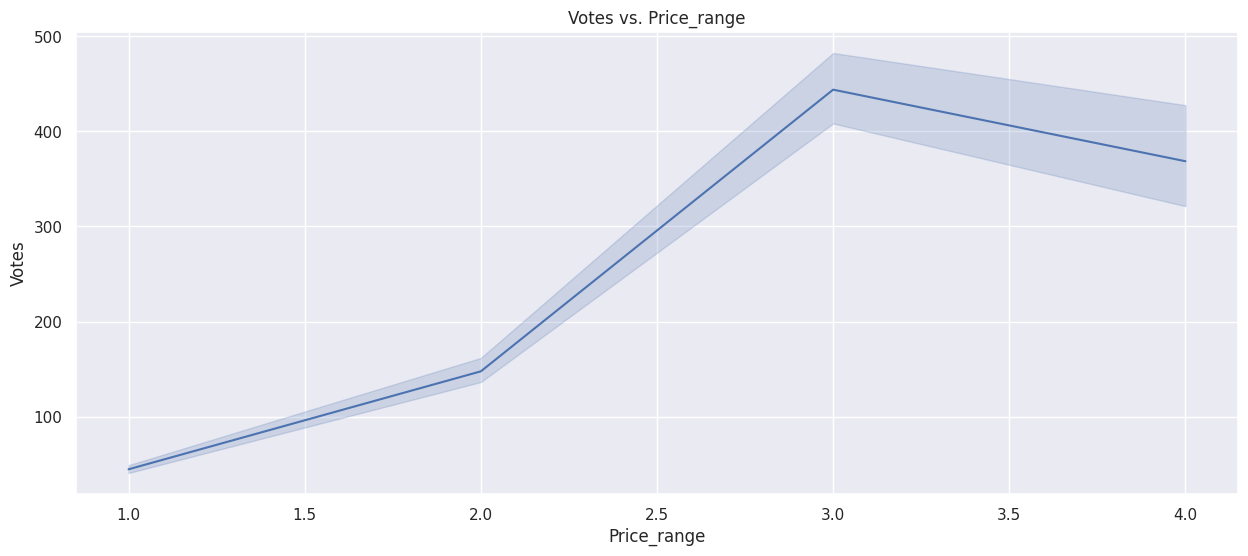

In [74]:
plt.figure(figsize = (15,6))
sns.lineplot(y = 'Votes', x = 'Price_range', data = zomato_country_data)
plt.title("Votes vs. Price_range")
plt.show()

**Insights from above chart:**
* By comparing the value counts for each price range category ('1', '2', '3', '4') with the plot, one can understand the correlation between the count of votes and the specific price range.
* Observing the line's trend in relation to the provided value counts can reveal patterns in customer engagement. For instance, if there's a steep rise or fall in votes across price ranges, it may indicate a strong positive or negative correlation between pricing and customer engagement.

#### Chart 2

#### Aggregate Rating vs. Price_range

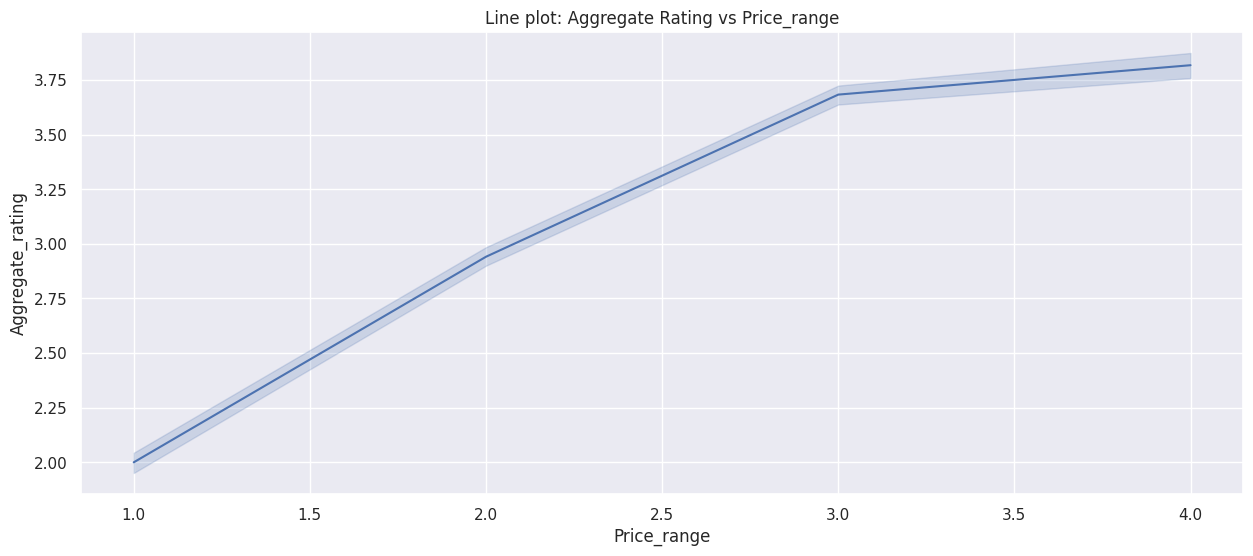

In [58]:
rating_price = zomato_country_data.groupby('Price_range')['Aggregate_rating'].mean()

rating_price

plt.figure(figsize = (15,6))
sns.lineplot(y = 'Aggregate_rating', x = 'Price_range', data = zomato_country_data)
plt.title("Line plot: Aggregate Rating vs Price_range")
plt.show()

**Insights from above chart:**
* The line plot illustrates how the average ratings vary across different price ranges (1 to 4). It shows if there's any trend or pattern in restaurant ratings concerning their pricing categories.

#### Chart 3

#### Average Cost for two vs Price range

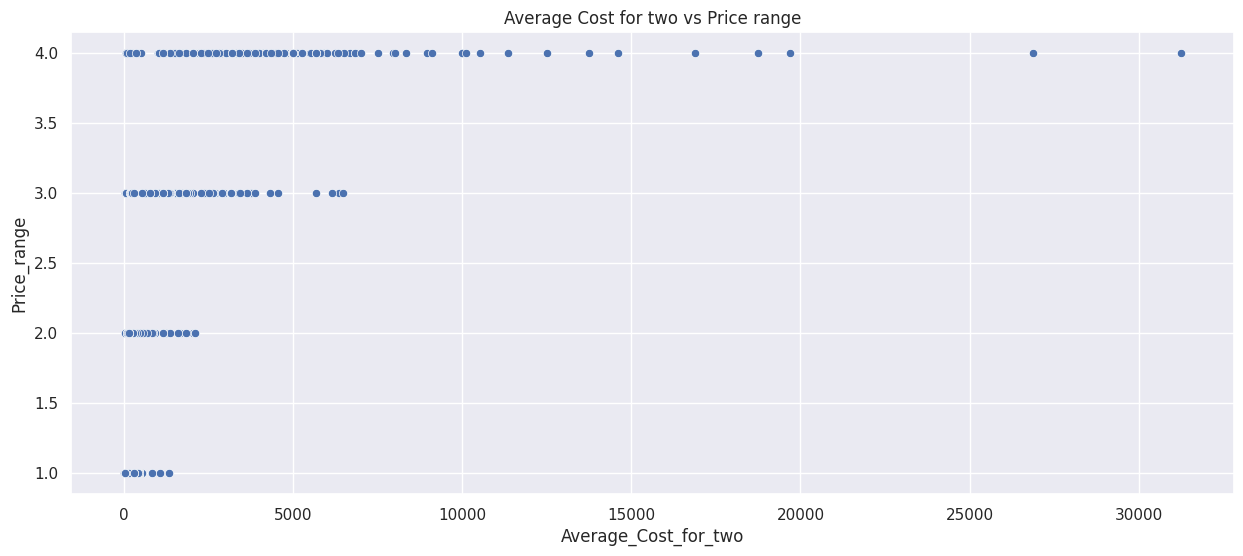

In [59]:
plt.figure(figsize = (15,6))
sns.scatterplot(x = 'Average_Cost_for_two' , y = 'Price_range', data = zomato_country_data)
plt.title("Average Cost for two vs Price range")
plt.show()

***Insights mentioned above***

#### Chart 4

#### Country vs Price_range

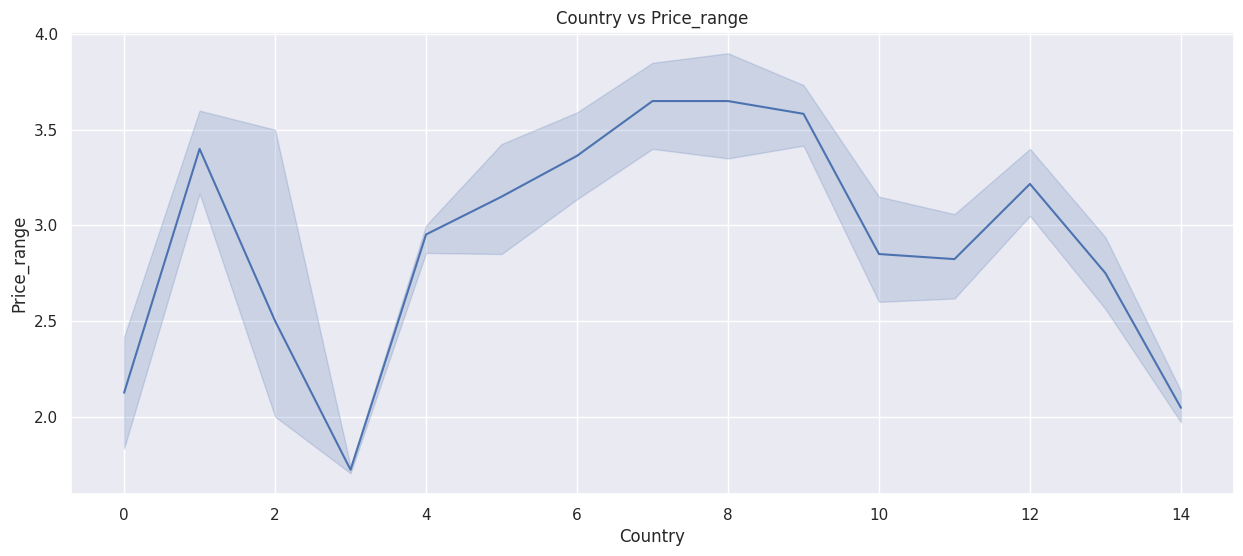

In [60]:
country_price = zomato_country_data.groupby('Country')['Price_range'].mean()

country_price

plt.figure(figsize = (15,6))
sns.lineplot(x = 'Country' , y = 'Price_range', data = zomato_country_data)
plt.title("Country vs Price_range")
plt.show()

**Insights from above chart:**
* The line plot might represent how 'Price_range' varies across different countries.
* Significant deviations from the trendline could indicate countries with unique pricing patterns, whether notably higher or lower than the average price ranges observed.

### ML Model - 1

#### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV


# Defining x and y variable

x = no_outliers[['City', 'Locality','Average_Cost_for_two', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now',
       'Aggregate_rating', 'Rating_text', 'Votes', 'Country']]

y = no_outliers['Price_range']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Predicting on test set results
y_pred = log_reg.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Logistic Regression")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(log_reg, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(LogisticRegression(), param_grid=param_grid_lr, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Logistic Regression after hypertuning model :",grid_search_cv.best_score_*100)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy score: 82.88389513108613
Classifiction report:
               precision    recall  f1-score   support

           1       0.88      0.95      0.91      1356
           2       0.80      0.79      0.79       905
           3       0.66      0.58      0.62       315
           4       0.76      0.30      0.43        94

    accuracy                           0.83      2670
   macro avg       0.77      0.66      0.69      2670
weighted avg       0.82      0.83      0.82      2670

Confusion matrix:
 [[1283   72    1    0]
 [ 144  718   40    3]
 [  18  107  184    6]
 [   6    5   55   28]]




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c



Cross Validation Scores: [37.58426966 86.23595506 78.82022472 72.64044944 67.64044944]




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters for hypertuning Parameters : {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score for Logistic Regression after hypertuning model : 86.70947030497592


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Insights from  Logistic Regression Model:**

* The overall accuracy of the model on the test dataset is around 82.88%.
* The precision for class 1 is high (0.88), indicating a high percentage of correctly classified instances among those predicted as class 1.
* Recall for class 3 and 4 is relatively lower (0.58 and 0.30 respectively), suggesting that the model struggles to capture all instances of these classes.F1-scores show a trade-off between precision and recall, summarizing a balance between the two metrics.
* Class 1 has the highest support (1356), followed by Class 2 (905), Class 3 (315), and Class 4 (94).
* The best parameters found after hyperparameter tuning are {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}.The model's accuracy improved to 86.71% after hyperparameter tuning

### ML Model - 2

#### K Neighbors Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier

# Defining x and y variable

x = no_outliers[['City', 'Locality','Average_Cost_for_two', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now',
       'Aggregate_rating', 'Rating_text', 'Votes', 'Country']]

y = no_outliers['Price_range']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

# Predicting on test set results
y_pred = knn_classifier.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("K Neighbors Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(knn_classifier, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 25, 30, 35, 40],
    'p': [1, 2]
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for K Neighbors Classifier after hypertuning model :",grid_search_cv.best_score_*100)

K Neighbors Classifier
Accuracy score: 88.42696629213484
Classifiction report:
               precision    recall  f1-score   support

           1       0.96      0.93      0.94      1356
           2       0.85      0.90      0.87       905
           3       0.75      0.79      0.77       315
           4       0.73      0.46      0.56        94

    accuracy                           0.88      2670
   macro avg       0.82      0.77      0.79      2670
weighted avg       0.89      0.88      0.88      2670

Confusion matrix:
 [[1255   99    2    0]
 [  50  814   38    3]
 [   7   46  249   13]
 [   2    4   45   43]]




Cross Validation Scores: [75.61797753 91.17977528 91.85393258 94.38202247 85.56179775]


Best Parameters for hypertuning Parameters : {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Best Score for K Neighbors Classifier after hypertuning model : 90.06420545746388


### **Insights from  K Neighbors Classifier Model:**

* Accuracy Score: Initially, the model achieved an accuracy of approximately 88.42%.
* Best Parameters for hypertuning Parameters : {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
* The best accuracy achieved after tuning improved to 90.06, marking an enhancement from the initial accuracy.

**The model performance improved after hyperparameter tuning, emphasizing the importance of optimizing hyperparameters for better accuracy.**

### ML Model - 3

#### SVC

In [65]:
from sklearn.svm import SVC

# Defining x and y variable

x = no_outliers[['City', 'Locality','Average_Cost_for_two', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now',
       'Aggregate_rating', 'Rating_text', 'Votes', 'Country']]

y = no_outliers['Price_range']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
svc_classifier = SVC()
svc_classifier.fit(x_train, y_train)

# Predicting on test set results
y_pred = svc_classifier.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("SVC classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(svc_classifier, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['auto'],
    'degree': [3, 4]
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(SVC(), param_grid=param_grid_svc, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for SVC Classifier after hypertuning model :",grid_search_cv.best_score_*100)

SVC classifier
Accuracy score: 92.92134831460675
Classifiction report:
               precision    recall  f1-score   support

           1       0.97      0.97      0.97      1356
           2       0.92      0.95      0.93       905
           3       0.82      0.79      0.80       315
           4       0.83      0.56      0.67        94

    accuracy                           0.93      2670
   macro avg       0.88      0.82      0.84      2670
weighted avg       0.93      0.93      0.93      2670

Confusion matrix:
 [[1316   39    1    0]
 [  21  864   19    1]
 [  16   41  248   10]
 [   6    0   35   53]]




Cross Validation Scores: [74.38202247 90.8988764  97.35955056 95.61797753 85.16853933]


Best Parameters for hypertuning Parameters : {'C': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score for SVC Classifier after hypertuning model : 91.5569823434992


### **Insights from  SVC Classifier Model:**

* Overall Accuracy: 92.92%
* The model exhibits strong overall accuracy (92.92%) and performs well for classes 1 and 2 but less effectively for classes 3 and 4.
* Class 1: High precision, recall, and F1-score (97%, 97%, 97%), Class 2: Good precision, recall, and F1-score (92%, 95%, 93%) , Class 3: Moderate precision, recall, and F1-score (82%, 79%, 80%) , Class 4: Lower precision, recall, and F1-score (83%, 56%, 67%)

### ML Model - 4

#### Decision Tree Classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier

# Defining x and y variable

x = no_outliers[['City', 'Locality','Average_Cost_for_two', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now',
       'Aggregate_rating', 'Rating_text', 'Votes', 'Country']]

y = no_outliers['Price_range']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
Decision_tress = DecisionTreeClassifier()
Decision_tress.fit(x_train, y_train)

# Predicting on test set results
y_pred = Decision_tress.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Decision Tree Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(Decision_tress, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Decision Tree Classifier after hypertuning model :",grid_search_cv.best_score_*100)

Decision Tree Classifier
Accuracy score: 97.75280898876404
Classifiction report:
               precision    recall  f1-score   support

           1       0.99      0.99      0.99      1356
           2       0.98      0.98      0.98       905
           3       0.92      0.95      0.94       315
           4       0.90      0.89      0.90        94

    accuracy                           0.98      2670
   macro avg       0.95      0.95      0.95      2670
weighted avg       0.98      0.98      0.98      2670

Confusion matrix:
 [[1343   12    1    0]
 [   7  883   14    1]
 [   0    7  300    8]
 [   0    0   10   84]]




Cross Validation Scores: [40.33707865 96.34831461 99.94382022 99.21348315 86.40449438]




/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Parameters for hypertuning Parameters : {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score for Decision Tree Classifier after hypertuning model : 95.31300160513645


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


### **Insights from  Decision Tree Classifier Model:**

* Accuracy: The classifier achieves an accuracy of 97.75%, indicating that it correctly predicts the class label for nearly 98% of the samples.
* Precision, Recall, and F1-score: For each class (1, 2, 3, 4), precision, recall, and F1-score are reported. Overall, the model shows high precision, recall, and F1-scores, indicating robustness across different classes.
* Best Parameters: The hyperparameters selected after tuning result in a model with the best score of approximately 95.31%, slightly lower than the original accuracy.
* The best hyperparameters include 'criterion', 'max_depth', 'max_features', 'min_samples_leaf', and 'min_samples_split', which aim to optimize the model's performance.

### ML Model - 5

#### Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Defining x and y variable

x = no_outliers[['City', 'Locality','Average_Cost_for_two', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now',
       'Aggregate_rating', 'Rating_text', 'Votes', 'Country']]

y = no_outliers['Price_range']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
rand_forest = RandomForestClassifier()
rand_forest.fit(x_train, y_train)

# Predicting on test set results
y_pred = rand_forest.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Random Forest Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(rand_forest, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto']
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Random Forest Classifier after hypertuning model :",grid_search_cv.best_score_*100)

Random Forest Classifier
Accuracy score: 97.34082397003745
Classifiction report:
               precision    recall  f1-score   support

           1       0.99      0.99      0.99      1356
           2       0.98      0.97      0.98       905
           3       0.88      0.96      0.92       315
           4       0.93      0.74      0.83        94

    accuracy                           0.97      2670
   macro avg       0.95      0.92      0.93      2670
weighted avg       0.97      0.97      0.97      2670

Confusion matrix:
 [[1347    8    1    0]
 [   7  880   18    0]
 [   0    8  302    5]
 [   0    0   24   70]]




Cross Validation Scores: [ 41.06741573  96.57303371 100.          99.21348315  87.30337079]




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters for hypertuning Parameters : {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Score for Random Forest Classifier after hypertuning model : 97.1589085072231


### **Insights from  Random Forest Classifier Model:**

* The model achieved an accuracy of approximately 97.34%.
* Class 1 and Class 2 have high precision, recall, and F1-scores, indicating excellent performance in predicting these classes.Class 3 has slightly lower but still acceptable precision, recall, and F1-score.Class 4 shows comparatively lower precision, recall, and F1-score, especially in recall and F1-score metrics.

### ML Model - 6

#### Gradient Boosting Classifier

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

# Defining x and y variable

x = no_outliers[['City', 'Locality','Average_Cost_for_two', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now',
       'Aggregate_rating', 'Rating_text', 'Votes', 'Country']]

y = no_outliers['Price_range']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
gboost = GradientBoostingClassifier()
gboost.fit(x_train, y_train)

# Predicting on test set results
y_pred = gboost.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Gradient Boosting Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(gboost, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_gb = {
    'learning_rate': [0.1, 0.05],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid_gb, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Gradient Boosting Classifier after hypertuning model :",grid_search_cv.best_score_*100)

Gradient Boosting Classifier
Accuracy score: 97.45318352059925
Classifiction report:
               precision    recall  f1-score   support

           1       0.99      1.00      1.00      1356
           2       0.98      0.97      0.98       905
           3       0.89      0.94      0.91       315
           4       0.93      0.80      0.86        94

    accuracy                           0.97      2670
   macro avg       0.95      0.93      0.94      2670
weighted avg       0.97      0.97      0.97      2670

Confusion matrix:
 [[1352    3    1    0]
 [   6  880   19    0]
 [   1   13  295    6]
 [   0    1   18   75]]




Cross Validation Scores: [ 40.84269663  96.40449438 100.          99.26966292  86.68539326]


Best Parameters for hypertuning Parameters : {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Score for Gradient Boosting Classifier after hypertuning model : 97.75280898876404


### **Insights from   Gradient Boosting Classifier Model:**

* The model achieves an overall accuracy of approximately 97.45%, indicating it correctly predicts the class for roughly 97.45% of the instances in the dataset.
* The cross-validation scores show a wide range, from around 40% to 100%.
* The best parameters for the Gradient Boosting Classifier after hypertuning resulted in a slight improvement in performance, increasing the best score to approximately 97.75%.
* Overall, the model performs well with high accuracy, especially in predicting Classes 1 and 2.

### ML Model - 7

#### Extra Trees Classifier

In [70]:
from sklearn.ensemble import ExtraTreesClassifier

# Defining x and y variable

x = no_outliers[['City', 'Locality','Average_Cost_for_two', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now',
       'Aggregate_rating', 'Rating_text', 'Votes', 'Country']]

y = no_outliers['Price_range']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
extra_tree = ExtraTreesClassifier()
extra_tree.fit(x_train, y_train)

# Predicting on test set results
y_pred = extra_tree.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Extra Trees Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(extra_tree, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_et = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [None, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider for best split
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(ExtraTreesClassifier(), param_grid=param_grid_et, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Extra Trees Classifier after hypertuning model :",grid_search_cv.best_score_*100)

Extra Trees Classifier
Accuracy score: 96.51685393258427
Classifiction report:
               precision    recall  f1-score   support

           1       1.00      0.99      0.99      1356
           2       0.96      0.97      0.97       905
           3       0.85      0.95      0.90       315
           4       0.94      0.68      0.79        94

    accuracy                           0.97      2670
   macro avg       0.94      0.90      0.91      2670
weighted avg       0.97      0.97      0.96      2670

Confusion matrix:
 [[1338   17    1    0]
 [   6  877   21    1]
 [   0   14  298    3]
 [   0    1   29   64]]




Cross Validation Scores: [41.57303371 94.60674157 99.71910112 98.20224719 87.02247191]




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters for hypertuning Parameters : {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score for Extra Trees Classifier after hypertuning model : 96.69341894060996


### **Insights from  Extra Trees Classifier Model:**

* The model achieves an accuracy score of approximately 96.52%, indicating that it correctly predicts the class label for 96.52% of the instances in the dataset.
* Most of the misclassifications seem to occur between classes 2 and 3, and between classes 3 and 4.
* The best hyperparameters for the Extra Trees Classifier after hyperparameter tuning indicate certain settings that maximize performance based on the given dataset.



---


## **Conclusion**


---



### **Considering the overall accuracy and the balanced performance across different classes, the Decision Tree Classifier, Random Forest Classifier, and Gradient Boosting Classifier appear to be the top-performing models in this scenario, with accuracy scores ranging between 97% and 98%. Among these, the Gradient Boosting Classifier slightly edges ahead with its consistently high performance across multiple evaluation metrics.**

#### Will Save for Random Forest Regressor Model, **Price_Range_Best_Model**

In [75]:
# Save the model to a file
with open('Price_Range_Best_Model.pkl', 'wb') as file:
    pickle.dump(gboost, file)


# Load the saved model from file
with open('Price_Range_Best_Model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)